# Problem Statement

Venue Concept Performance Benchmarking

**Objective:**  
This project aims to benchmark the performance of different **venue concepts** (e.g., BAR, FINE DINING, CAFE, BREWERY) using transactional data from the TouchBistro POS system. We analyze **sales efficiency**, **tipping behavior**, and **order duration** across venues to identify operational strengths and weaknesses. The goal is to provide actionable insights that can help venues optimize their operations and improve customer experience.

**Key Questions:**
1. Which venue concepts achieve the highest **sales efficiency** per order and per minute of service?
2. How do **tipping behaviors** vary by venue concept and geographic location?
3. Are there significant differences in **order durations** across venue types, and how do they impact revenue?

---


# Dataset Overview

**1. Venues Dataset:**  
Contains information about various venues, including their **concept** (e.g., BAR, FINE DINING), **city**, **country**, and **start_of_day_offset**.

**Key Fields:**
- `venue_xref_id`: Unique identifier for the venue.
- `concept`: Type or category of the venue.
- `city`, `country`: Geographical location of the venue.
- `start_of_day_offset`: Start time of the business day.

**2. Bills Dataset:**  
Contains detailed records of each bill, including sales amounts, tips, and order durations.

**Key Fields:**
- `bill_total_billed`, `bill_total_net`: Total and net amounts billed.
- `payment_total_tip`: Total tip amount paid.
- `order_duration_seconds`: Duration of the order.
- `venue_xref_id`: Identifier to link with the Venues dataset.
- `business_date`: Operational date of the bill.

These datasets will be joined on **`venue_xref_id`** to facilitate the analysis.

---


# Approach & Methodology

1. **Data Cleaning & Preprocessing:**  
   - Handle missing values and anomalies (e.g., unrealistic order durations).
   
2. **Exploratory Data Analysis (EDA):**  
   - Analyze sales, tips, and order durations across different venue concepts.

3. **Benchmarking Performance Metrics:**  
   - Calculate key performance indicators (KPIs) such as **sales per minute**, **average tip percentage**, and **average order duration** for each venue concept.

4. **Visualization:**  
   - Create comparative visualizations to highlight differences across venue types.

5. **Insights & Recommendations:**  
   - Summarize key findings and provide actionable recommendations.

---


# Step 0: Link to google drive and show file contents

In [1]:
# Link to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Get the data folder
data_folder = '/content/drive/MyDrive/TouchBistro/CxCData'
venue_file = os.path.join(data_folder, 'venues.csv')

# Load and display csv files
venues_df = pd.read_csv(venue_file)

venues_df.head()

,venue_xref_id,concept,city,country,start_of_day_offset
0,ea74268311cfcc47d2b4c38ef08b9dab0117226a9a99a9...,FAST_FOOD,Albuquerque,US,00:00:00
1,e7cec41c46a9706ba1a702b368be5431913b6dc9c9da49...,FAMILY_DINING,Brooklyn,US,00:00:00
2,e63e79791883b0c4ac71d41eaee727932c13d6a4ec8f78...,FAST_CASUAL,Windsor,CA,00:00:00
3,c100388c9328b30b6bdfbea43f113d367ae9d32b03e84b...,BAR,Burnaby,CA,01:00:00
4,a819ee7f83f27dd3d7f44515e22aca3c26e6704ddd2a9b...,FAMILY_DINING,Tisdale,CA,00:00:00


In [ ]:
bills_file = os.path.join(data_folder, 'bills.csv')

# Load and display csv files
bills_df = pd.read_csv(bills_file)

bills_df.head()

,bill_paid_at_local,bill_total_billed,bill_total_discount_item_level,bill_total_gratuity,bill_total_net,bill_total_tax,bill_total_voided,bill_uuid,business_date,order_duration_seconds,order_seated_at_local,order_closed_at_local,order_take_out_type_label,order_uuid,payment_amount,payment_count,payment_total_tip,sales_revenue_with_tax,venue_xref_id,waiter_uuid
0,2024-07-01 09:17:01,21.81,0.0,0.0,19.30,2.51,0.0,240701091701~4D63608F-523C-4EFF-9A4F-78D6C44B5159,2024-07-01,46,2024-07-01 09:16:15,2024-07-01 09:17:01,dinein,240701091615~EF1C6E91-B6C4-4DF1-8A92-1B024197FEC3,21.81,1,0.0,21.81,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
1,2024-07-01 13:37:00,48.95,0.0,0.0,43.32,5.63,0.0,240701133659~3A0BEDE2-E9E5-484D-B909-780E485F0D69,2024-07-01,288,2024-07-01 13:32:12,2024-07-01 13:37:00,dinein,240701133212~A4C33BFA-A54F-4627-B0C2-7428427FB5DE,48.95,1,0.0,48.95,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
2,2024-07-01 11:19:32,26.94,0.0,0.0,23.84,3.10,0.0,240701111931~670EEB85-E939-4924-B92F-C95076B7E930,2024-07-01,135,2024-07-01 11:17:17,2024-07-01 11:19:32,dinein,240701111717~6074B0AB-2432-484D-BC3F-55CC5D731818,26.94,1,0.0,26.94,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
3,2024-07-01 15:05:59,3.96,0.0,0.0,3.77,0.19,0.0,240701150558~3D6F473E-D5EF-4BB8-AFAB-30DB2A0764C0,2024-07-01,48,2024-07-01 15:05:11,2024-07-01 15:05:59,dinein,240701150511~EAA68F41-20ED-4FC7-B902-B0B3878AEC82,3.96,1,0.0,3.96,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
4,2024-07-01 12:41:00,3.36,0.0,0.0,3.20,0.16,0.0,240701124059~0521794C-51FC-4C30-A368-995CE4DE105F,2024-07-01,103,2024-07-01 12:39:17,2024-07-01 12:41:00,dinein,240701123917~27764E1C-7E7F-4293-ABC7-5921310A654A,3.36,1,0.0,3.36,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD


# Step 1: Data Cleaning & Preprocessing:

In [ ]:
# Join the two datafiles
combined_df = pd.merge(venues_df, bills_df, on='venue_xref_id')
combined_df.head()

# Delete the original DataFrames to free up memory
del venues_df
del bills_df

# Run garbage collection to clean up memory
import gc
gc.collect()

# Check that combined_df is intact
combined_df.head()

,venue_xref_id,concept,city,country,start_of_day_offset,bill_paid_at_local,bill_total_billed,bill_total_discount_item_level,bill_total_gratuity,bill_total_net,...,order_duration_seconds,order_seated_at_local,order_closed_at_local,order_take_out_type_label,order_uuid,payment_amount,payment_count,payment_total_tip,sales_revenue_with_tax,waiter_uuid
0,ea74268311cfcc47d2b4c38ef08b9dab0117226a9a99a9...,FAST_FOOD,Albuquerque,US,00:00:00,2024-07-19 11:38:03,13.43,0.0,0.0,12.48,...,849,2024-07-19 11:23:54,2024-07-19 11:38:03,dinein,240719112354~16D0457E-3426-4D27-821B-BACFFA2D4C67,13.43,1,0.0,13.43,c29c030d-ff51-46be-96f0-d7e00ff56a96
1,ea74268311cfcc47d2b4c38ef08b9dab0117226a9a99a9...,FAST_FOOD,Albuquerque,US,00:00:00,2024-07-19 12:05:58,12.89,0.0,0.0,11.98,...,767,2024-07-19 11:53:11,2024-07-19 12:05:58,dinein,240719115311~B69E1B72-B737-4A4A-9544-0DAD947F7326,12.89,1,0.0,12.89,c29c030d-ff51-46be-96f0-d7e00ff56a96
2,ea74268311cfcc47d2b4c38ef08b9dab0117226a9a99a9...,FAST_FOOD,Albuquerque,US,00:00:00,2024-07-19 12:35:30,21.02,0.0,0.0,19.53,...,549,2024-07-19 12:26:21,2024-07-19 12:35:30,dinein,240719122621~42A7592C-8821-4E85-A8FE-C72F45D23048,21.02,1,0.0,21.02,c29c030d-ff51-46be-96f0-d7e00ff56a96
3,ea74268311cfcc47d2b4c38ef08b9dab0117226a9a99a9...,FAST_FOOD,Albuquerque,US,00:00:00,2024-07-19 16:37:06,18.28,0.0,0.0,16.98,...,71,2024-07-19 16:35:55,2024-07-19 16:37:06,dinein,240719163555~E72AAD91-2234-4516-888F-556332409A0B,18.28,1,0.0,18.28,c29c030d-ff51-46be-96f0-d7e00ff56a96
4,ea74268311cfcc47d2b4c38ef08b9dab0117226a9a99a9...,FAST_FOOD,Albuquerque,US,00:00:00,2024-07-20 15:31:44,5.37,0.0,0.0,4.99,...,29,2024-07-20 15:31:15,2024-07-20 15:31:44,dinein,240720153115~9AD99B33-3CA2-4BE4-A093-D11F9A30B3ED,5.37,1,0.0,5.37,c29c030d-ff51-46be-96f0-d7e00ff56a96


In [ ]:
print("Total number of data points", len(combined_df))

# Drop missing values
combined_df.dropna(inplace=True)

print("Total number of data points after dropping missing values", len(combined_df))

# Remove order_duration_seconds that are larger than a day
combined_df = combined_df.loc[combined_df['order_duration_seconds'] < 86400]

print("Total number of data points after dropping order_duration_seconds that are larger than a day", len(combined_df))

Total number of data points 8954786
Total number of data points after dropping missing values 7371239
Total number of data points after dropping order_duration_seconds that are larger than a day 7327407


In [ ]:
gc.collect()

7

# Step 2: Exploratory Data Analysis

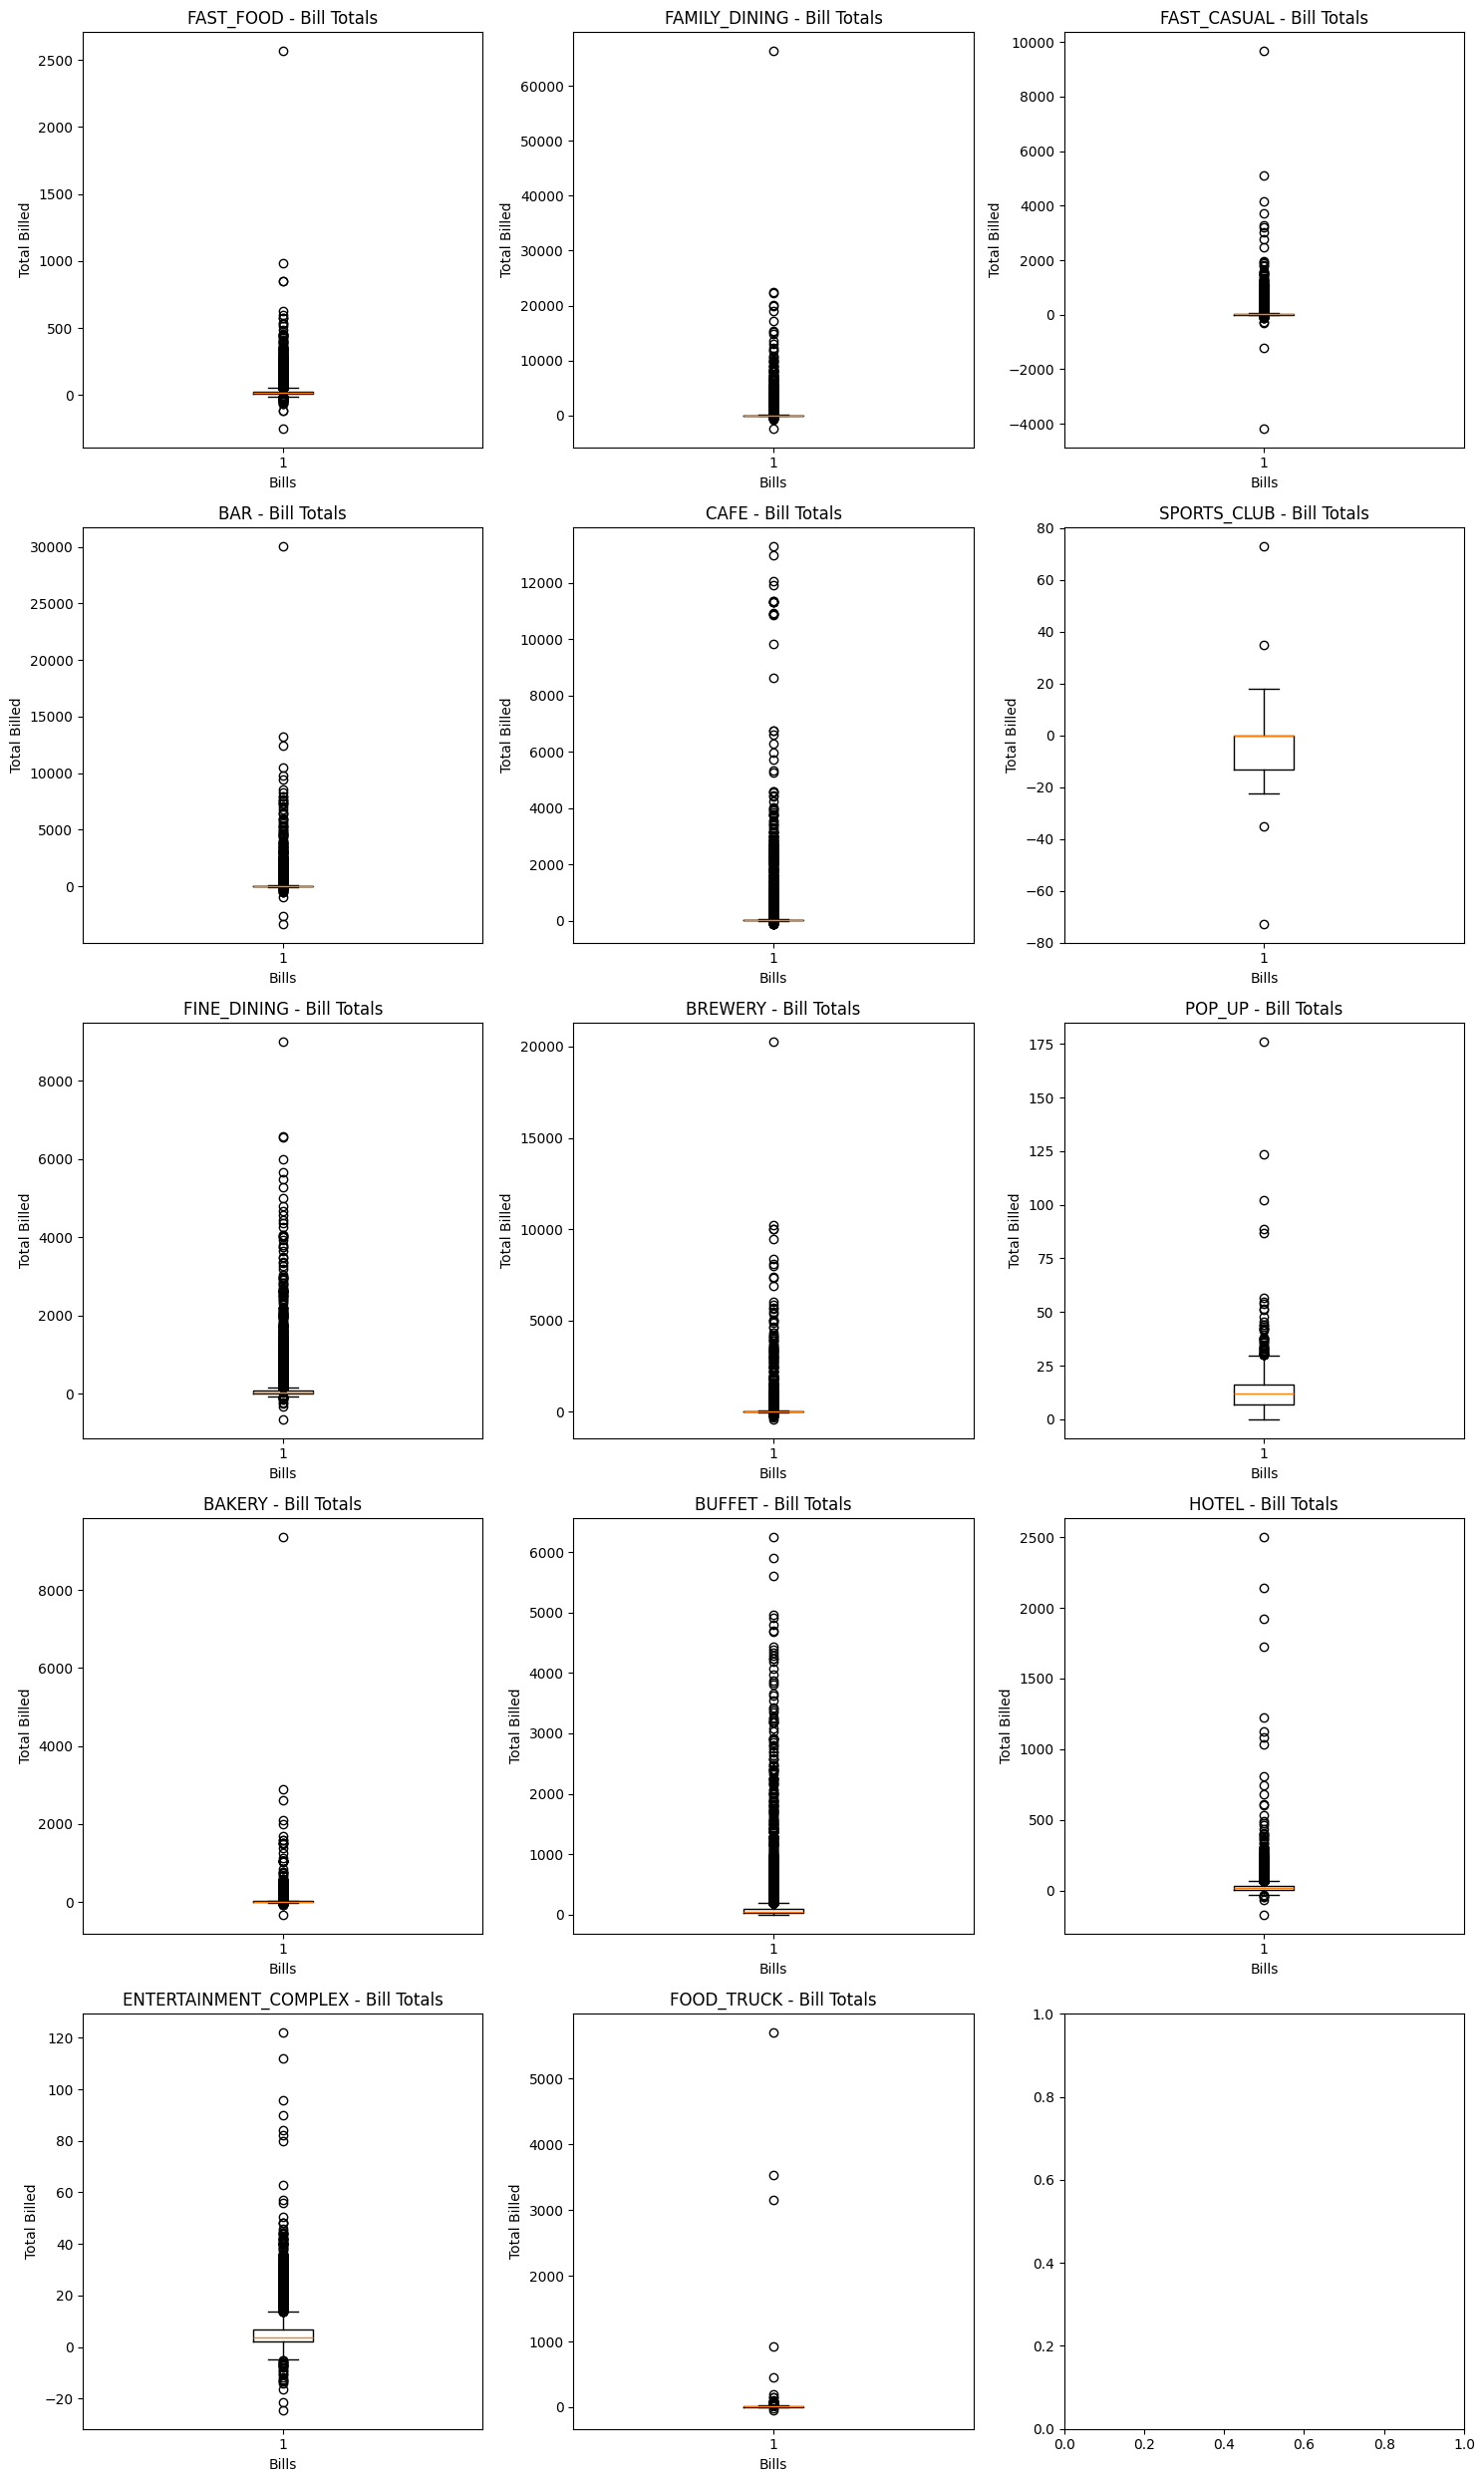

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique venue concepts
venue_types = combined_df['concept'].dropna().unique()
num_venues = len(venue_types)

# Determine the number of rows and columns for subplots
cols = 3  # Number of columns
rows = int(np.ceil(num_venues / cols))  # Number of rows based on the number of venue types

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Generate box plots for each venue type
for i, venue_type in enumerate(venue_types):
    venue_data = combined_df[combined_df['concept'] == venue_type]
    axes[i].boxplot(venue_data['bill_total_net'])
    axes[i].set_title(f'{venue_type} - Bill Totals')
    axes[i].set_xlabel('Bills')
    axes[i].set_ylabel('Total Billed')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Analysis and Further Step

### **1. Removing Negative Bills**

Negative values in the `bill_total_billed` field are **not logically valid** for most transactional data in the restaurant industry. Bills should reflect the amount charged to customers, which cannot be negative unless there's a **refund** or **data entry error**. Since the dataset focuses on analyzing **sales performance**, retaining negative values would **skew the results** and misrepresent the financial health of the venues.

- **Possible Causes of Negative Bills:**
  - Voided transactions or incorrect refund entries.
  - Data entry errors or system glitches.

**Action:**  
We will remove all negative bills to ensure that our analysis focuses on valid transactions reflecting actual revenue.

---

### **2. Re-Plotting Box Plots After Removing Negative Bills**

After removing negative bills, we will generate box plots again to visually inspect the **distribution of bill totals**. This helps identify remaining **outliers** and ensures that the data looks reasonable before deeper analysis.

---

### **3. Focusing on the Interquartile Range (IQR) with Standard Outlier Detection**

To avoid the influence of **extreme outliers** (both unusually high and low bills), we will apply the **standard IQR method** for outlier detection. This approach captures the **middle 50%** of the data while allowing for a reasonable range beyond typical values to include natural variations in billing behavior. It is a widely used statistical technique to reduce the impact of anomalies and provide a clearer picture of typical transaction behavior.

- **Why Use the IQR Method with 1.5 Multiplier?**
  - The **Interquartile Range (IQR)** is the difference between the **75th percentile (Q3)** and the **25th percentile (Q1)**, representing the spread of the middle 50% of data.
  - To identify outliers, we use the standard formula:
    - **Lower Bound** = \( Q1 - 1.5 * IQR \)
    - **Upper Bound** = \( Q3 + 1.5 * IQR \)
  - Data points outside this range are considered **outliers** and will be excluded from the analysis.

Focusing on this range helps highlight **typical billing behavior** while minimizing the impact of rare, extreme transactions that could distort the analysis.

**Action:**  
We will filter the data to include only values within the **IQR boundaries** (between \( Q1 - 1.5 * IQR \) and \( Q3 + 1.5 * IQR \)), then generate box plots again to visualize the **refined distribution** of bill totals.

---

By applying these steps, we aim to ensure that our analysis reflects **accurate**, **reliable**, and **representative** insights into the financial performance of different venue types.


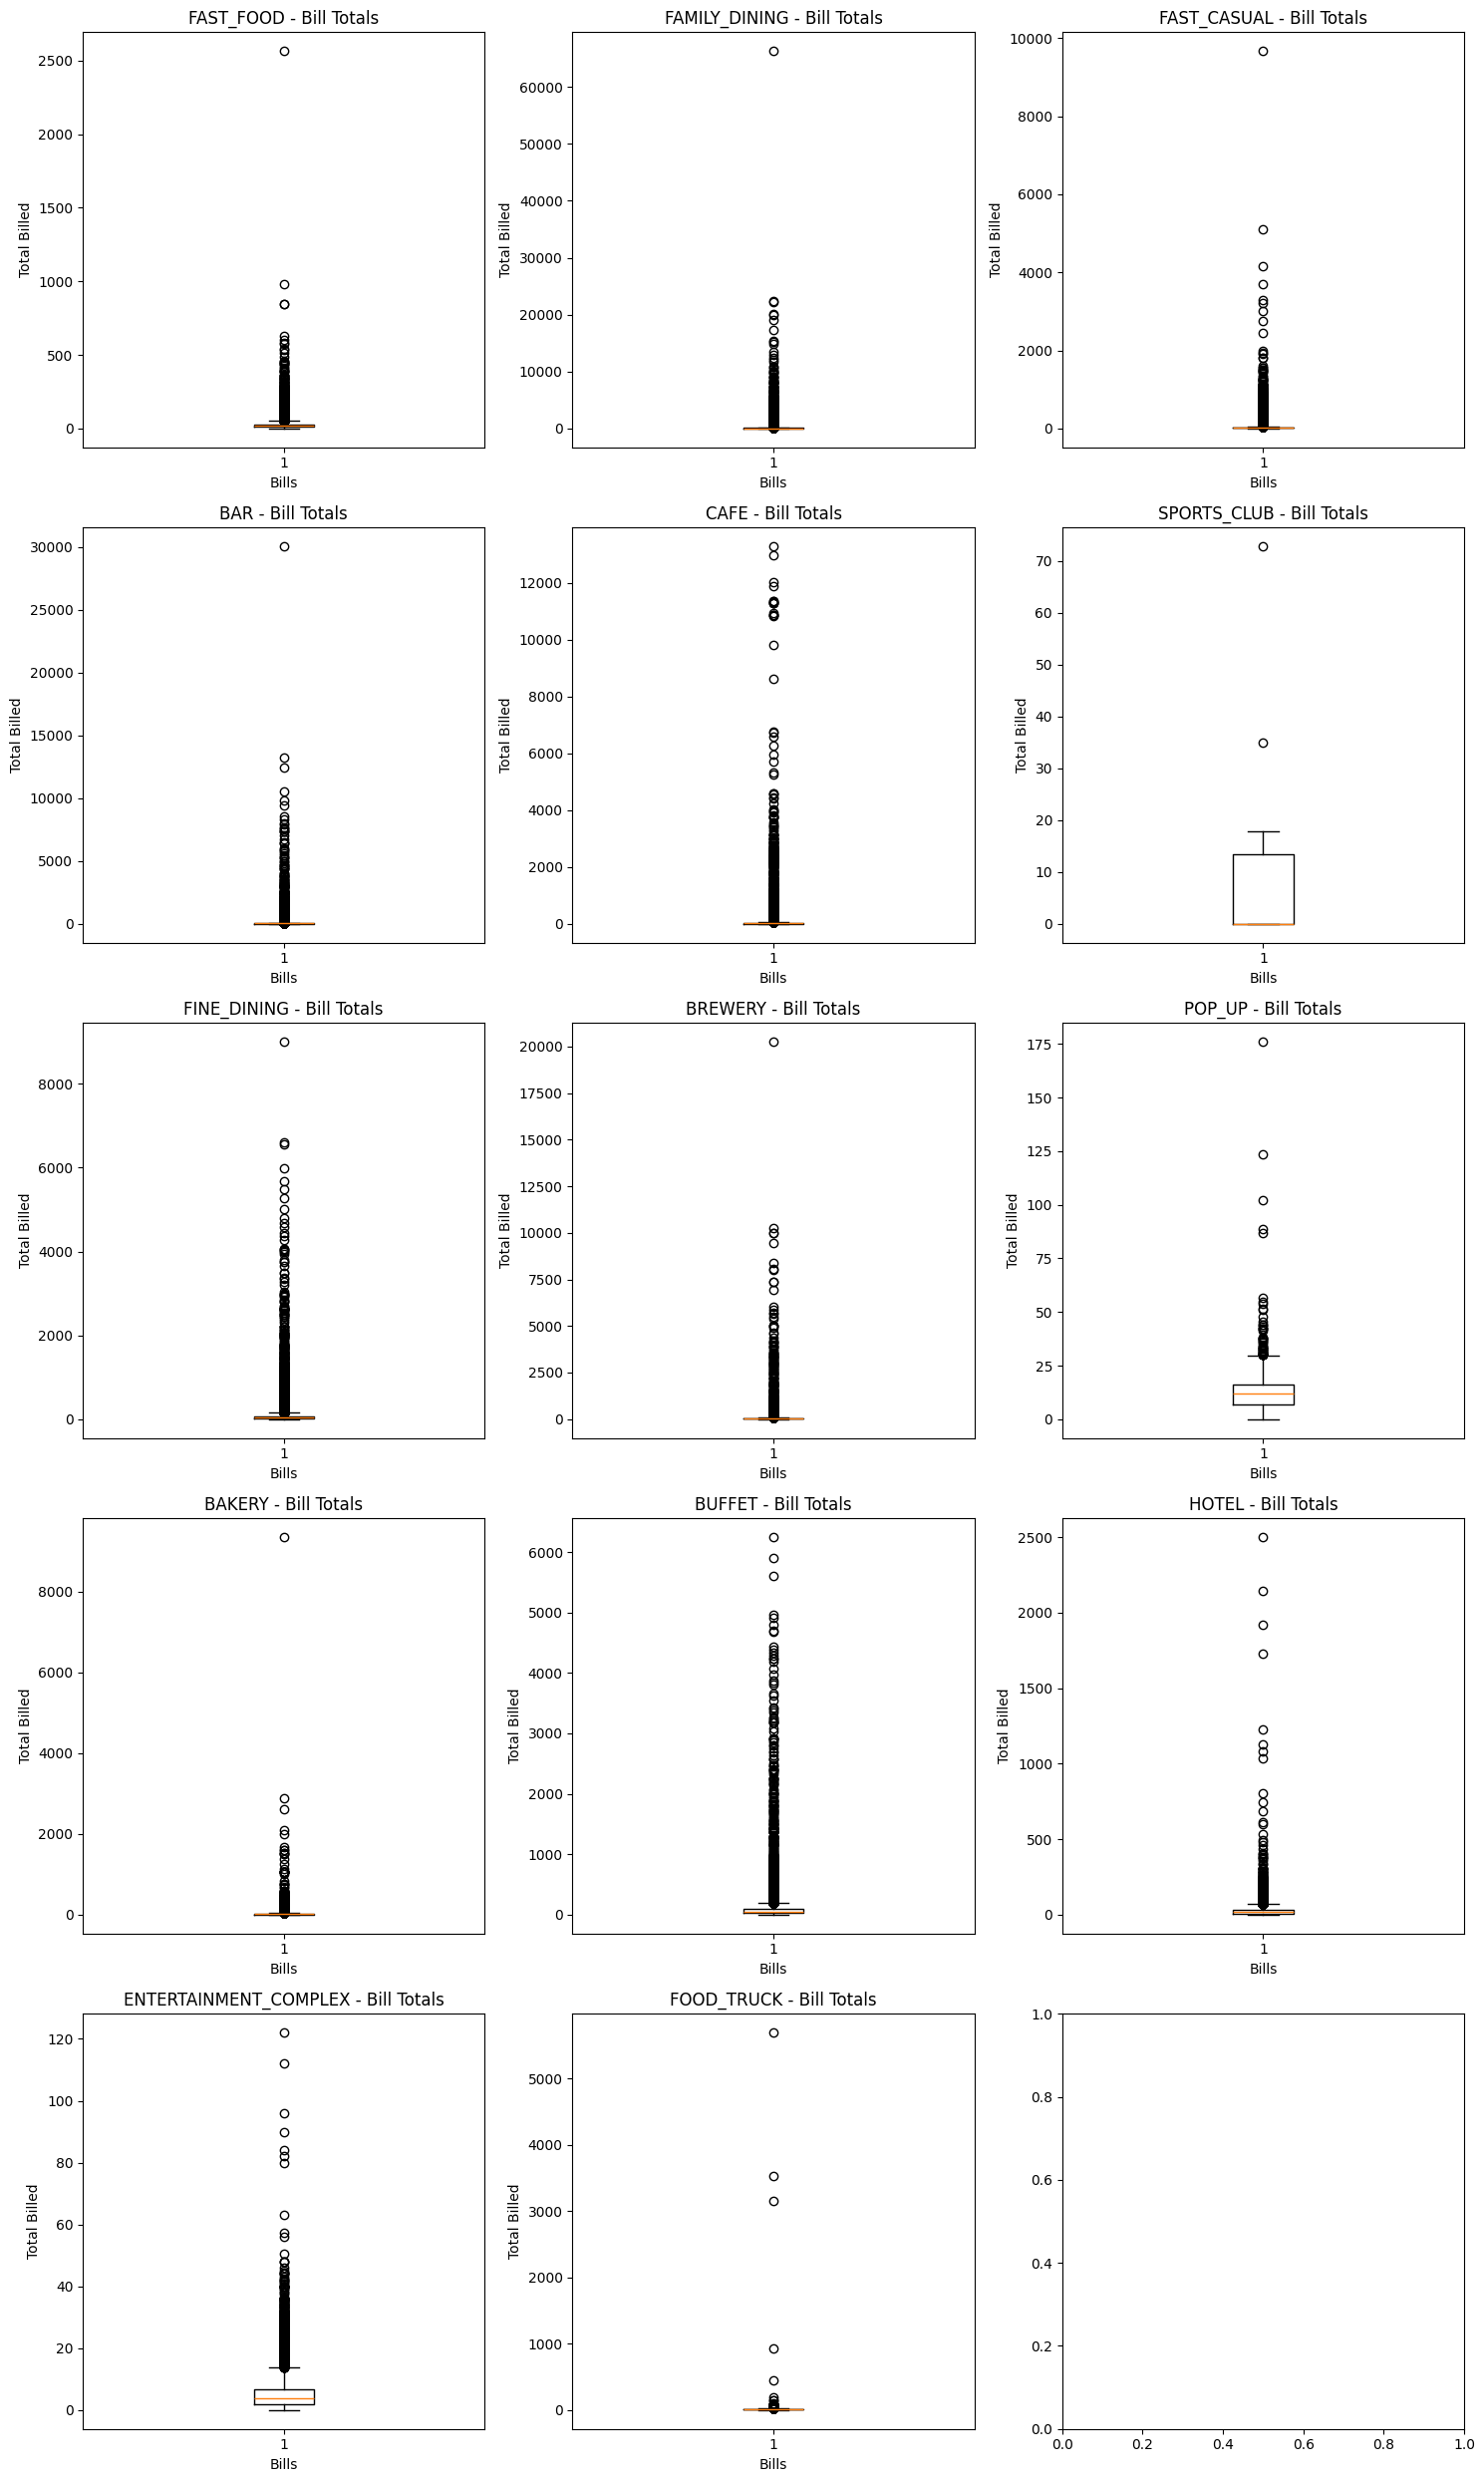

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Remove negative ones
combined_df = combined_df.loc[combined_df['bill_total_billed'] >= 0]

# Get unique venue concepts
venue_types = combined_df['concept'].dropna().unique()
num_venues = len(venue_types)

# Determine the number of rows and columns for subplots
cols = 3  # Number of columns
rows = int(np.ceil(num_venues / cols))  # Number of rows based on the number of venue types

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Generate box plots for each venue type
for i, venue_type in enumerate(venue_types):
    venue_data = combined_df[combined_df['concept'] == venue_type]
    axes[i].boxplot(venue_data['bill_total_net'])
    axes[i].set_title(f'{venue_type} - Bill Totals')
    axes[i].set_xlabel('Bills')
    axes[i].set_ylabel('Total Billed')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
from tqdm import tqdm
import pandas as pd

# Initialize an empty DataFrame to store the filtered data
filtered_combined_df = pd.DataFrame()

# Get unique venue concepts
venue_types = combined_df['concept'].dropna().unique()

# Loop through each venue type
for venue_type in tqdm(venue_types, desc="Processing venue types"):
    # Filter data for the current venue type
    venue_data = combined_df[combined_df['concept'] == venue_type]

    # Calculate Q1 and Q3 for bill_total_billed
    Q1 = venue_data['bill_total_billed'].quantile(0.25)
    Q3 = venue_data['bill_total_billed'].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the whisker boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data using IQR boundaries (to exclude extreme outliers)
    venue_filtered = venue_data[venue_data['bill_total_billed'].between(lower_bound, upper_bound)]

    # Append the filtered data back to the final DataFrame
    filtered_combined_df = pd.concat([filtered_combined_df, venue_filtered], ignore_index=True)

# Now filtered_combined_df contains only values within the IQR for each venue type
del combined_df
gc.collect()

Processing venue types: 100%|██████████| 14/14 [00:54<00:00,  3.86s/it]


9

In [ ]:
import pandas as pd

# Print number of data points
print("Total number of data points", len(filtered_combined_df))

# Save as a dataframe
filtered_combined_df.to_csv(os.path.join(data_folder, 'filtered_combined_df.csv'), index=False)

Total number of data points 6842342


# Load the Filtered_Combined_df CSV

In [2]:
import pandas as pd
import os

# Load the CSV
data_folder = '/content/drive/MyDrive/TouchBistro/CxCData'
filtered_combined_df = pd.read_csv(os.path.join(data_folder, 'filtered_combined_df.csv'))

# Helper Function to Generate Statistical Information and Box Plots

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def compute_stats_and_box_plot(field):
    # Get unique venue concepts
    venue_types = filtered_combined_df['concept'].dropna().unique()
    num_venues = len(venue_types)

    # Determine the number of rows and columns for subplots
    cols = 3  # Number of columns
    rows = int(np.ceil(num_venues / cols))  # Number of rows based on the number of venue types

    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

    # Generate box plots for each venue type
    for i, venue_type in enumerate(venue_types):
        venue_data = filtered_combined_df[filtered_combined_df['concept'] == venue_type]

        # Compute statistics
        mean_value = venue_data[field].mean()
        median_value = venue_data[field].median()
        Q1 = venue_data[field].quantile(0.25)
        Q3 = venue_data[field].quantile(0.75)
        IQR = Q3 - Q1
        std_dev = venue_data[field].std()
        coefficient_variation = (std_dev / mean_value) if mean_value != 0 else np.nan  # CV = Std / Mean
        skewness = venue_data[field].skew()
        kurtosis = venue_data[field].kurt()

        # Print key stats for each venue type, and the field
        print(f"\n--- {venue_type} ---")
        print(f"Field: {field}")
        print(f"Mean: {mean_value:.2f}")
        print(f"Median: {median_value:.2f}")
        print(f"IQR (Q3 - Q1): {IQR:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        print(f"Coefficient of Variation (CV): {coefficient_variation:.2f}")
        print(f"Skewness: {skewness:.2f} (Indicates asymmetry of distribution)")
        print(f"Kurtosis: {kurtosis:.2f} (Indicates tail heaviness)")

        # Generate box plot
        axes[i].boxplot(venue_data[field])
        axes[i].set_title(f'{venue_type} - {field}')
        axes[i].set_xlabel(field)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


# Analyze sales across different venue concepts.


--- FAST_FOOD ---
Field: bill_total_net
Mean: 18.94
Median: 15.80
IQR (Q3 - Q1): 15.50
Standard Deviation: 11.77
Coefficient of Variation (CV): 0.62
Skewness: 0.84 (Indicates asymmetry of distribution)
Kurtosis: 0.23 (Indicates tail heaviness)

--- FAMILY_DINING ---
Field: bill_total_net
Mean: 35.43
Median: 30.00
IQR (Q3 - Q1): 32.52
Standard Deviation: 25.00
Coefficient of Variation (CV): 0.71
Skewness: 0.86 (Indicates asymmetry of distribution)
Kurtosis: 0.21 (Indicates tail heaviness)

--- FAST_CASUAL ---
Field: bill_total_net
Mean: 16.79
Median: 13.85
IQR (Q3 - Q1): 15.42
Standard Deviation: 11.97
Coefficient of Variation (CV): 0.71
Skewness: 1.04 (Indicates asymmetry of distribution)
Kurtosis: 0.54 (Indicates tail heaviness)

--- BAR ---
Field: bill_total_net
Mean: 26.80
Median: 20.00
IQR (Q3 - Q1): 29.98
Standard Deviation: 22.02
Coefficient of Variation (CV): 0.82
Skewness: 1.05 (Indicates asymmetry of distribution)
Kurtosis: 0.44 (Indicates tail heaviness)

--- CAFE ---
Field:

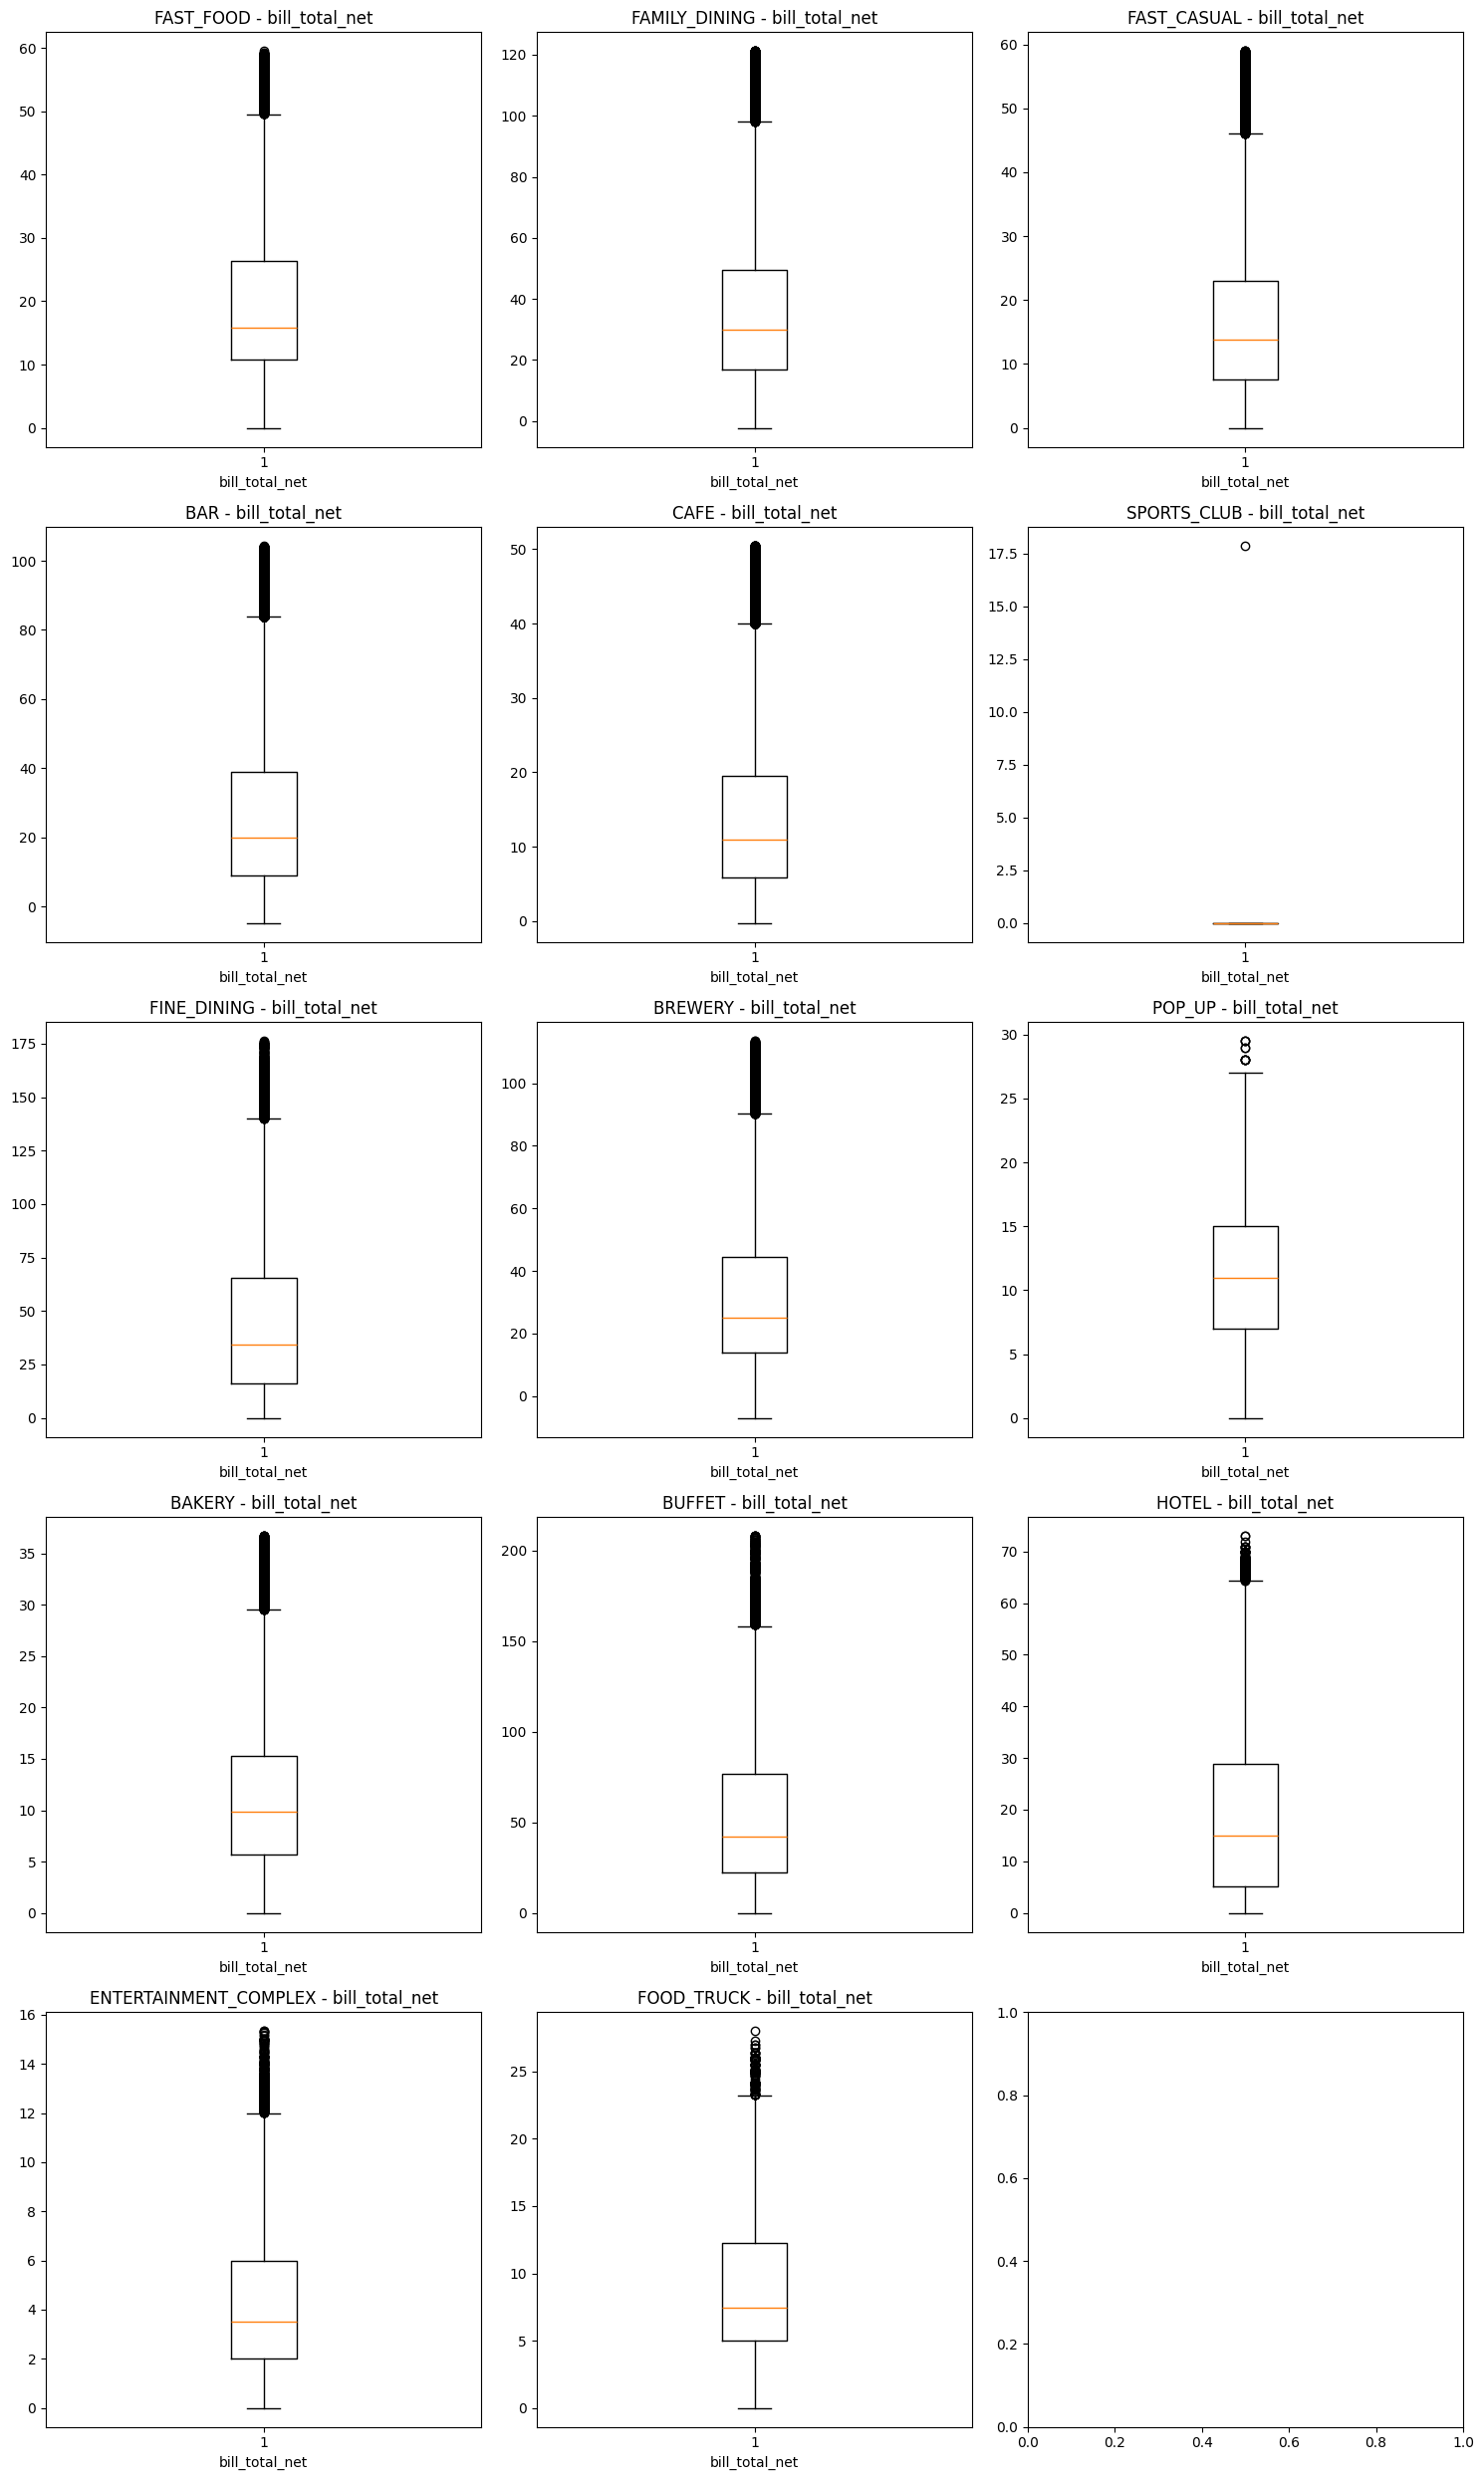

In [7]:
compute_stats_and_box_plot("bill_total_net")

In [ ]:
import pandas as pd

# Create a dictionary with the summary statistics
data = {
    "Venue Type": [
        "FAST_FOOD", "FAMILY_DINING", "FAST_CASUAL", "BAR", "CAFE", "SPORTS_CLUB",
        "FINE_DINING", "BREWERY", "POP_UP", "BAKERY", "BUFFET", "HOTEL",
        "ENTERTAINMENT_COMPLEX", "FOOD_TRUCK"
    ],
    "Mean ()": [18.94, 35.43, 16.79, 26.80, 14.12, 2.23, 44.93, 31.68, 11.35, 11.72, 55.43, 18.87, 4.42, 8.97],
    "Median ()": [15.80, 30.00, 13.85, 20.00, 10.90, 0.00, 34.50, 25.05, 11.00, 9.84, 41.99, 14.93, 3.50, 7.44],
    "IQR ()": [15.50, 32.52, 15.42, 29.98, 13.68, 0.00, 49.68, 30.50, 8.00, 9.55, 54.49, 23.72, 4.00, 7.29],
    "Std Dev ()": [11.77, 25.00, 11.97, 22.02, 10.72, 6.31, 37.00, 23.51, 6.27, 7.67, 43.00, 16.29, 2.96, 5.47],
    "CV": [0.62, 0.71, 0.71, 0.82, 0.76, 2.83, 0.82, 0.74, 0.55, 0.65, 0.78, 0.86, 0.67, 0.61],
    "Skewness": [0.84, 0.86, 1.04, 1.05, 1.14, 2.83, 1.01, 1.02, 0.62, 1.02, 1.12, 0.84, 1.17, 1.02],
    "Kurtosis": [0.23, 0.21, 0.54, 0.44, 0.63, 8.00, 0.35, 0.36, 0.06, 0.47, 0.77, -0.02, 0.71, 0.61]
}

# Create a DataFrame
df_summary = pd.DataFrame(data)

from IPython.display import display

# Display the summary DataFrame
display(df_summary)



,Venue Type,Mean ($),Median ($),IQR ($),Std Dev ($),CV,Skewness,Kurtosis
0,FAST_FOOD,18.94,15.80,15.50,11.77,0.62,0.84,0.23
1,FAMILY_DINING,35.43,30.00,32.52,25.00,0.71,0.86,0.21
2,FAST_CASUAL,16.79,13.85,15.42,11.97,0.71,1.04,0.54
3,BAR,26.80,20.00,29.98,22.02,0.82,1.05,0.44
4,CAFE,14.12,10.90,13.68,10.72,0.76,1.14,0.63
5,SPORTS_CLUB,2.23,0.00,0.00,6.31,2.83,2.83,8.00
6,FINE_DINING,44.93,34.50,49.68,37.00,0.82,1.01,0.35
7,BREWERY,31.68,25.05,30.50,23.51,0.74,1.02,0.36
8,POP_UP,11.35,11.00,8.00,6.27,0.55,0.62,0.06
9,BAKERY,11.72,9.84,9.55,7.67,0.65,1.02,0.47


# **Analysis of Venue Type Billing Behavior**

## **1. General Trends**
The data provides key insights into **bill total distributions** across different venue types. By examining the **mean, median, IQR, standard deviation, coefficient of variation (CV), skewness, and kurtosis**, we can understand how **billing patterns differ across venues**.

- **Fine Dining (44.93) and Buffets (55.43) have the highest mean bill totals**, which aligns with expectations as they offer premium dining experiences.
- **Fast Food (18.94), Fast Casual (16.79), and Cafés (14.12) have lower average bills**, as they focus on quick, lower-cost meals.
- **Sports Clubs (2.23) and Entertainment Complexes (4.42) show extremely low mean values**, likely due to small-ticket transactions such as snack purchases or drinks.

---

## **2. Variability and Spread of Bill Totals**
- **Buffet dining has the highest IQR (54.49), followed by Fine Dining (49.68)**, indicating that bill totals in these categories **vary significantly** between customers.
- **Sports Clubs have an IQR of 0.00**, suggesting that most transactions are extremely small and **homogeneous**.
- **The Coefficient of Variation (CV)** highlights relative variability:
  - **Sports Clubs (CV = 2.83)** have **the highest variation**, meaning bills fluctuate greatly.
  - **Pop-Ups (CV = 0.55) and Food Truck (CV = 0.61) have the lowest variation**, indicating **consistent pricing**.

---

## **3. Skewness: Are Bills More Often Small or Large?**
Skewness tells us whether bill totals are **symmetrically distributed** or **skewed** toward higher or lower values.
- **Most venues are right-skewed (positive skewness)**, meaning that **a few high-value orders drive up the mean**.
- **Sports Clubs (2.83 skewness) and Entertainment Complexes (1.17 skewness)** have **the most extreme right-skewed distributions**, suggesting that **most transactions are small, but occasional large purchases exist**.

---

## **4. Kurtosis: Presence of Outliers**
Kurtosis measures the **“tailedness”** of a distribution—whether extreme values (outliers) are common.
- **Sports Clubs (8.00 kurtosis) have extreme outliers**, indicating that **most bills are very small**, but **some large outliers exist**.
- **Fine Dining (0.35) and Buffets (0.77) have moderate kurtosis**, meaning their bill totals show some variability but are not excessively extreme.
- **Negative kurtosis (e.g., Hotels: -0.02)** suggests a flatter distribution with fewer extreme values.

---

## **5. Interesting Observations**
- **Buffets have the highest mean (55.43) and second-highest median (41.99), but a very wide range of bill values**, indicating **high variability** in customer spending.
- **Bars (26.80) have a wider spread in bill totals compared to Cafés (14.12), likely due to customers ordering multiple rounds of drinks.**
- **Food Trucks (8.97) and Bakeries (11.72) have similar mean bill totals**, but **Bakeries have slightly higher variability (IQR = 9.55 vs. 7.29 for Food Trucks).**

---

## **Conclusion**
- **Venues with table service (Fine Dining, Buffets, and Family Dining) show higher bills and greater variability.**
- **Fast-service venues (Fast Food, Fast Casual, Food Trucks, and Cafés) show smaller, more consistent bill totals.**
- **Bars and Breweries exhibit higher variability, possibly due to customers ordering multiple drinks per visit.**
- **Sports Clubs and Entertainment Complexes stand out as having highly skewed distributions with occasional high-value bills.**

These insights can be **valuable for pricing strategies, operational planning, and revenue forecasting** across different venue types.



# Creative Suggestion: Leveraging Call Number Systems for Customer Flow Management
In Chinese restaurant markets, especially in large malls, many restaurants use a call number system to manage table assignments efficiently. These systems categorize tables into different sizes—small, medium, and large—and track customer flow based on the number of times each table type is assigned.

Instead of tracking only sales data, we propose tracking call numbers to measure 客流量 (customer flow) more accurately. This approach provides real-time insights into restaurant popularity and peak dining hours, allowing for better resource allocation and customer redirection.

# How This Idea Applies to Canada
1) In cities with a large Chinese population (e.g., Vancouver, Toronto, and Markham), similar call number systems are used in Chinese restaurants and food courts.

2) Many Asian restaurants in Canada still rely on manual queueing systems, but integrating digital tracking can optimize the seating process and operational efficiency.

3) Some advanced reservation systems (e.g., Menusifu, Playheads) already provide analytics on seating trends, customer wait times, and peak hours, but they do not yet focus on real-time seat allocation based on traffic data.

# Potential Benefits of This Approach
a) Improved Customer Flow Management.

- By analyzing call number data, restaurants can predict peak hours and optimize seating arrangements.
- Restaurants with high expected traffic can redirect customers to venues with lower traffic, reducing overcrowding.

b) Fairer Distribution of Customers Across Restaurants

- In a mall food court setting, certain restaurants may receive excessive customer demand, while others remain underutilized.
- Smart restaurant redirection ensures even customer distribution, increasing overall efficiency.

c) Enhancing Customer Experience

- Customers dislike long wait times. A predictive call number-based system can notify customers when a nearby restaurant has shorter wait times.
- This improves customer satisfaction and retention rates.

d) Data-Driven Restaurant Optimization

- Call number data allows restaurants to understand table turnover rates and peak times for different table sizes.
- This data can be used to adjust menu strategies, staff scheduling, and table configurations.

# Implementation and Future Possibilities
- Integrate digital queueing systems with real-time tracking and predictive modeling.
- Use AI-powered traffic forecasting to redirect customers dynamically.
- Apply dynamic pricing strategies based on customer demand patterns.

This approach has strong potential in both Chinese and Canadian markets, particularly in high-density urban areas where efficient seating management can maximize restaurant revenues and enhance customer satisfaction

# Now We Analyze Tipping Behaviours


--- FAST_FOOD ---
Field: bill_total_gratuity
Mean: 0.00
Median: 0.00
IQR (Q3 - Q1): 0.00
Standard Deviation: 0.09
Coefficient of Variation (CV): 69.87
Skewness: 75.71 (Indicates asymmetry of distribution)
Kurtosis: 6047.58 (Indicates tail heaviness)

--- FAMILY_DINING ---
Field: bill_total_gratuity
Mean: 0.12
Median: 0.00
IQR (Q3 - Q1): 0.00
Standard Deviation: 1.12
Coefficient of Variation (CV): 9.64
Skewness: 15.01 (Indicates asymmetry of distribution)
Kurtosis: 628.50 (Indicates tail heaviness)

--- FAST_CASUAL ---
Field: bill_total_gratuity
Mean: 0.02
Median: 0.00
IQR (Q3 - Q1): 0.00
Standard Deviation: 0.33
Coefficient of Variation (CV): 20.33
Skewness: 33.00 (Indicates asymmetry of distribution)
Kurtosis: 1604.11 (Indicates tail heaviness)

--- BAR ---
Field: bill_total_gratuity
Mean: 0.09
Median: 0.00
IQR (Q3 - Q1): 0.00
Standard Deviation: 0.83
Coefficient of Variation (CV): 9.29
Skewness: 14.66 (Indicates asymmetry of distribution)
Kurtosis: 308.42 (Indicates tail heaviness)


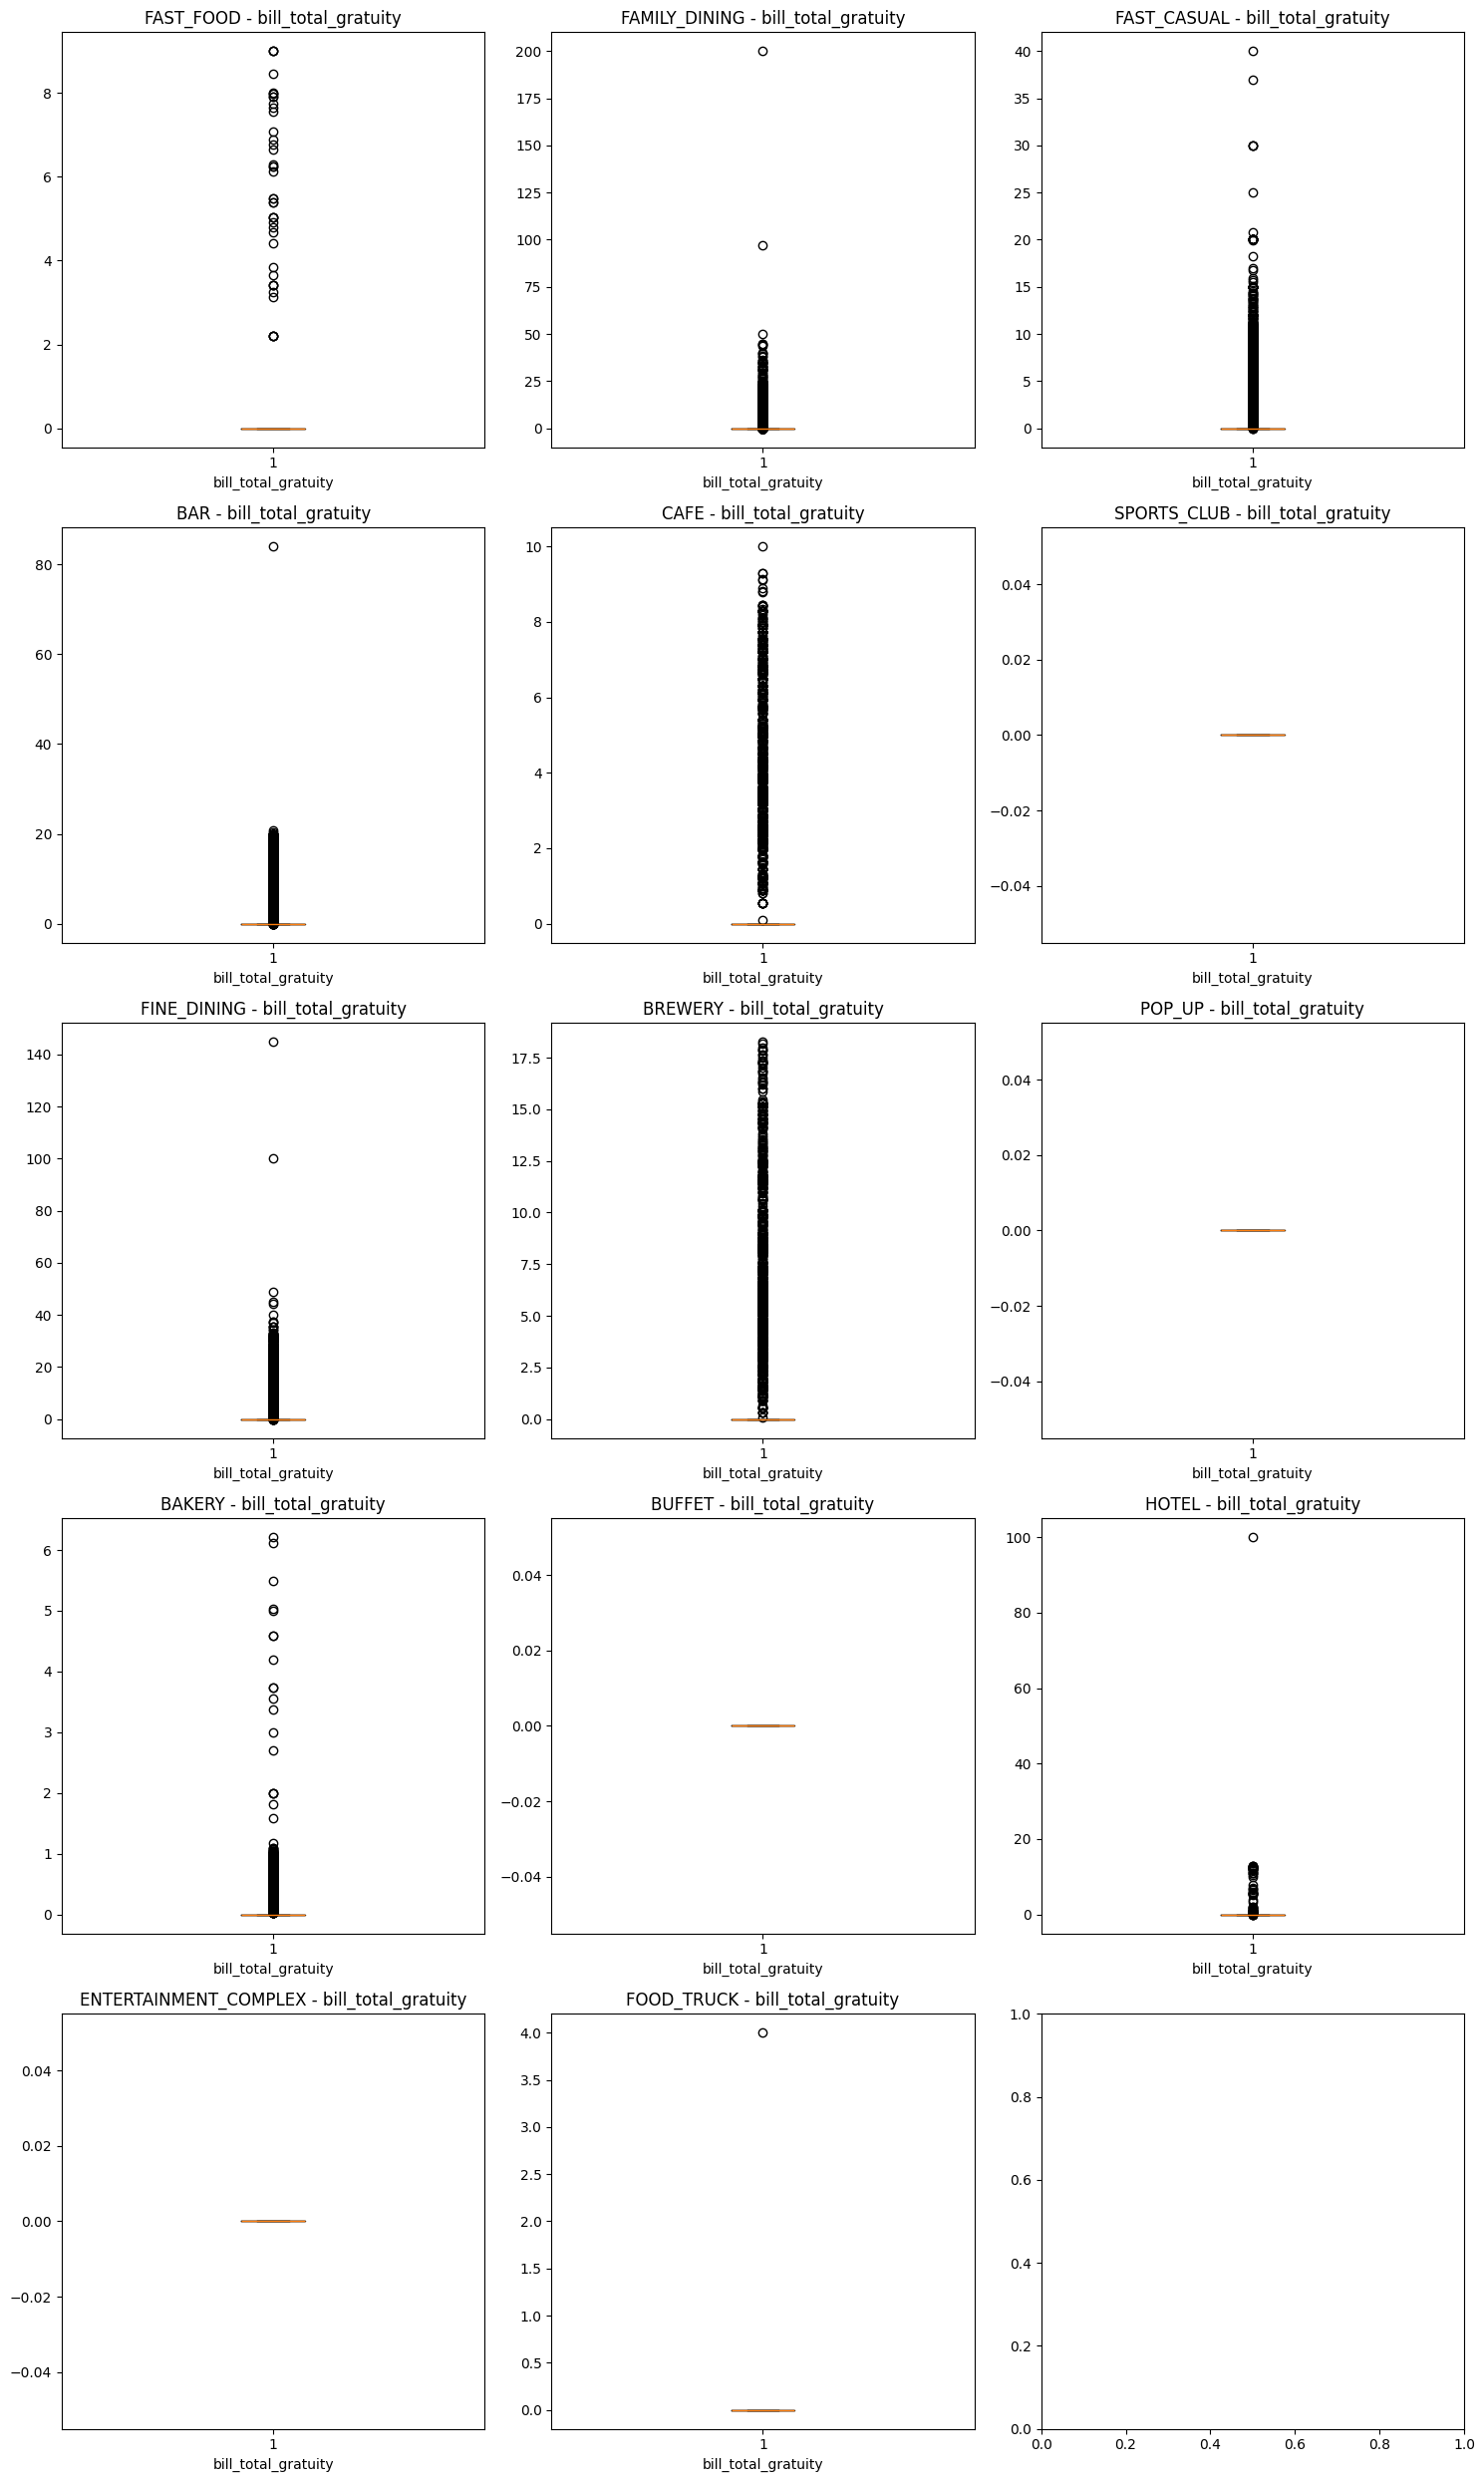

In [8]:
compute_stats_and_box_plot("bill_total_gratuity")

In [11]:
import pandas as pd

# Create a dictionary with the summary statistics for bill_total_gratuity
data = {
    "Venue Type": [
        "FAST_FOOD", "FAMILY_DINING", "FAST_CASUAL", "BAR", "CAFE", "SPORTS_CLUB",
        "FINE_DINING", "BREWERY", "POP_UP", "BAKERY", "BUFFET", "HOTEL",
        "ENTERTAINMENT_COMPLEX", "FOOD_TRUCK"
    ],
    "Mean ()": [0.00, 0.12, 0.02, 0.09, 0.00, 0.00, 0.22, 0.03, 0.00, 0.01, 0.00, 0.01, 0.00, 0.00],
    "Median ()": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    "IQR ()": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    "Std Dev ()": [0.09, 1.12, 0.33, 0.83, 0.13, 0.00, 1.33, 0.51, 0.00, 0.08, 0.00, 0.51, 0.00, 0.03],
    "CV": [69.87, 9.64, 20.33, 9.29, 39.76, "NaN", 5.98, 17.51, "NaN", 5.77, "NaN", 61.28, "NaN", 133.54],
    "Skewness": [75.71, 15.01, 33.00, 14.66, 46.01, 0.00, 19.19, 21.33, 0.00, 14.14, 0.00, 153.65, 0.00, 133.54],
    "Kurtosis": [6047.58, 628.50, 1604.11, 308.42, 2328.11, 0.00, 958.54, 518.01, 0.00, 579.60, 0.00, 29139.98, 0.00, 17832.00]
}

# Create a DataFrame
df_gratuity_summary = pd.DataFrame(data)

from IPython.display import display

# Display the summary DataFrame
display(df_gratuity_summary)


,Venue Type,Mean ($),Median ($),IQR ($),Std Dev ($),CV,Skewness,Kurtosis
0,FAST_FOOD,0.00,0.0,0.0,0.09,69.87,75.71,6047.58
1,FAMILY_DINING,0.12,0.0,0.0,1.12,9.64,15.01,628.50
2,FAST_CASUAL,0.02,0.0,0.0,0.33,20.33,33.00,1604.11
3,BAR,0.09,0.0,0.0,0.83,9.29,14.66,308.42
4,CAFE,0.00,0.0,0.0,0.13,39.76,46.01,2328.11
5,SPORTS_CLUB,0.00,0.0,0.0,0.00,NaN,0.00,0.00
6,FINE_DINING,0.22,0.0,0.0,1.33,5.98,19.19,958.54
7,BREWERY,0.03,0.0,0.0,0.51,17.51,21.33,518.01
8,POP_UP,0.00,0.0,0.0,0.00,NaN,0.00,0.00
9,BAKERY,0.01,0.0,0.0,0.08,5.77,14.14,579.60


# **Analysis of Venue Type Gratuity Behavior**

## **1. Most People Do Not Pay Tips**
- Across **all venue types**, the **median gratuity is 0**, meaning **at least 50% of transactions involve no tipping**.
- This suggests that tipping is **not a default practice** in these venues, possibly due to:
  - **Cultural differences** (e.g., tipping norms vary by country/region).
  - **Service model differences** (e.g., self-service venues where tipping is less expected).
  - **Digital payment limitations** that don’t prompt tipping.

---

## **2. Data is Highly Skewed with Extreme Outliers**
- **Skewness values are extremely high**, ranging from **14.14 (Bakery) to 153.65 (Hotel)**.
- A high **positive skew** means **most gratuity values are very low**, but **a few extreme cases exist** where large tips are given.
- The **high kurtosis values** (e.g., **29139.98 for Hotel, 17832.00 for Food Trucks**) indicate that **most gratuity amounts are clustered near zero**, with a few exceptionally high outliers.

---

## **3. Bakery and Fine Dining Have the Most Consistent Tipping Behavior**
- The **Coefficient of Variation (CV)** for **Bakery (5.77) and Fine Dining (5.98)** is the lowest (excluding NaN values).
- This suggests that **when tips are given, they tend to be more predictable**.
- Fine Dining is the **only category with a slightly higher mean (0.22)**, indicating that **customers here tip more frequently** compared to other venues.

---

## **4. Hotels and Food Trucks Have the Most Extreme Outliers**
- **Hotel (Skewness = 153.65, Kurtosis = 29139.98)** and **Food Truck (Skewness = 133.54, Kurtosis = 17832.00)** have extreme outliers.
- This suggests that **while most transactions involve no tipping, some customers leave extremely large gratuities**.
- This could be due to:
  - **Occasional high-end customers tipping well beyond the norm**.
  - **Miscalculated data entries or system rounding issues**.

---

## **5. Venue Types With No Meaningful Gratuity Data**
- **Sports Clubs, Buffets, Pop-Ups, and Entertainment Complexes** have **NaN CV values and zero skewness/kurtosis**.
- This suggests that **gratuity is either not recorded or almost nonexistent** in these venues.
- Possible explanations:
  - **Buffets often include service charges, reducing the need for tipping.**
  - **Entertainment Complexes and Sports Clubs may have tipping built into ticketing or other service fees.**

---

## **6. Insights for Business Strategy**
- **Fast food, cafes, and fast casual restaurants** may benefit from **prompting digital tipping** (e.g., self-service kiosks, payment screens).
- **Fine Dining venues could promote higher tipping culture** by emphasizing **personalized service**.
- **Hotels and food trucks should investigate extreme outliers**—they could either be **genuine high-end customer tips** or **data anomalies**.

This analysis reveals **how tipping behaviors vary significantly across venue types**, with key differences in **consistency, outliers, and tipping expectations**.


# Next we analyze order duration


--- FAST_FOOD ---
Field: order_duration_seconds
Mean: 1637.99
Median: 150.00
IQR (Q3 - Q1): 829.00
Standard Deviation: 7312.08
Coefficient of Variation (CV): 4.46
Skewness: 8.38 (Indicates asymmetry of distribution)
Kurtosis: 74.28 (Indicates tail heaviness)

--- FAMILY_DINING ---
Field: order_duration_seconds
Mean: 3428.36
Median: 2401.00
IQR (Q3 - Q1): 2785.00
Standard Deviation: 5810.74
Coefficient of Variation (CV): 1.69
Skewness: 7.38 (Indicates asymmetry of distribution)
Kurtosis: 74.56 (Indicates tail heaviness)

--- FAST_CASUAL ---
Field: order_duration_seconds
Mean: 1754.82
Median: 189.00
IQR (Q3 - Q1): 889.00
Standard Deviation: 7243.69
Coefficient of Variation (CV): 4.13
Skewness: 8.06 (Indicates asymmetry of distribution)
Kurtosis: 70.07 (Indicates tail heaviness)

--- BAR ---
Field: order_duration_seconds
Mean: 3221.25
Median: 1771.00
IQR (Q3 - Q1): 4009.00
Standard Deviation: 5796.87
Coefficient of Variation (CV): 1.80
Skewness: 6.69 (Indicates asymmetry of distribution)

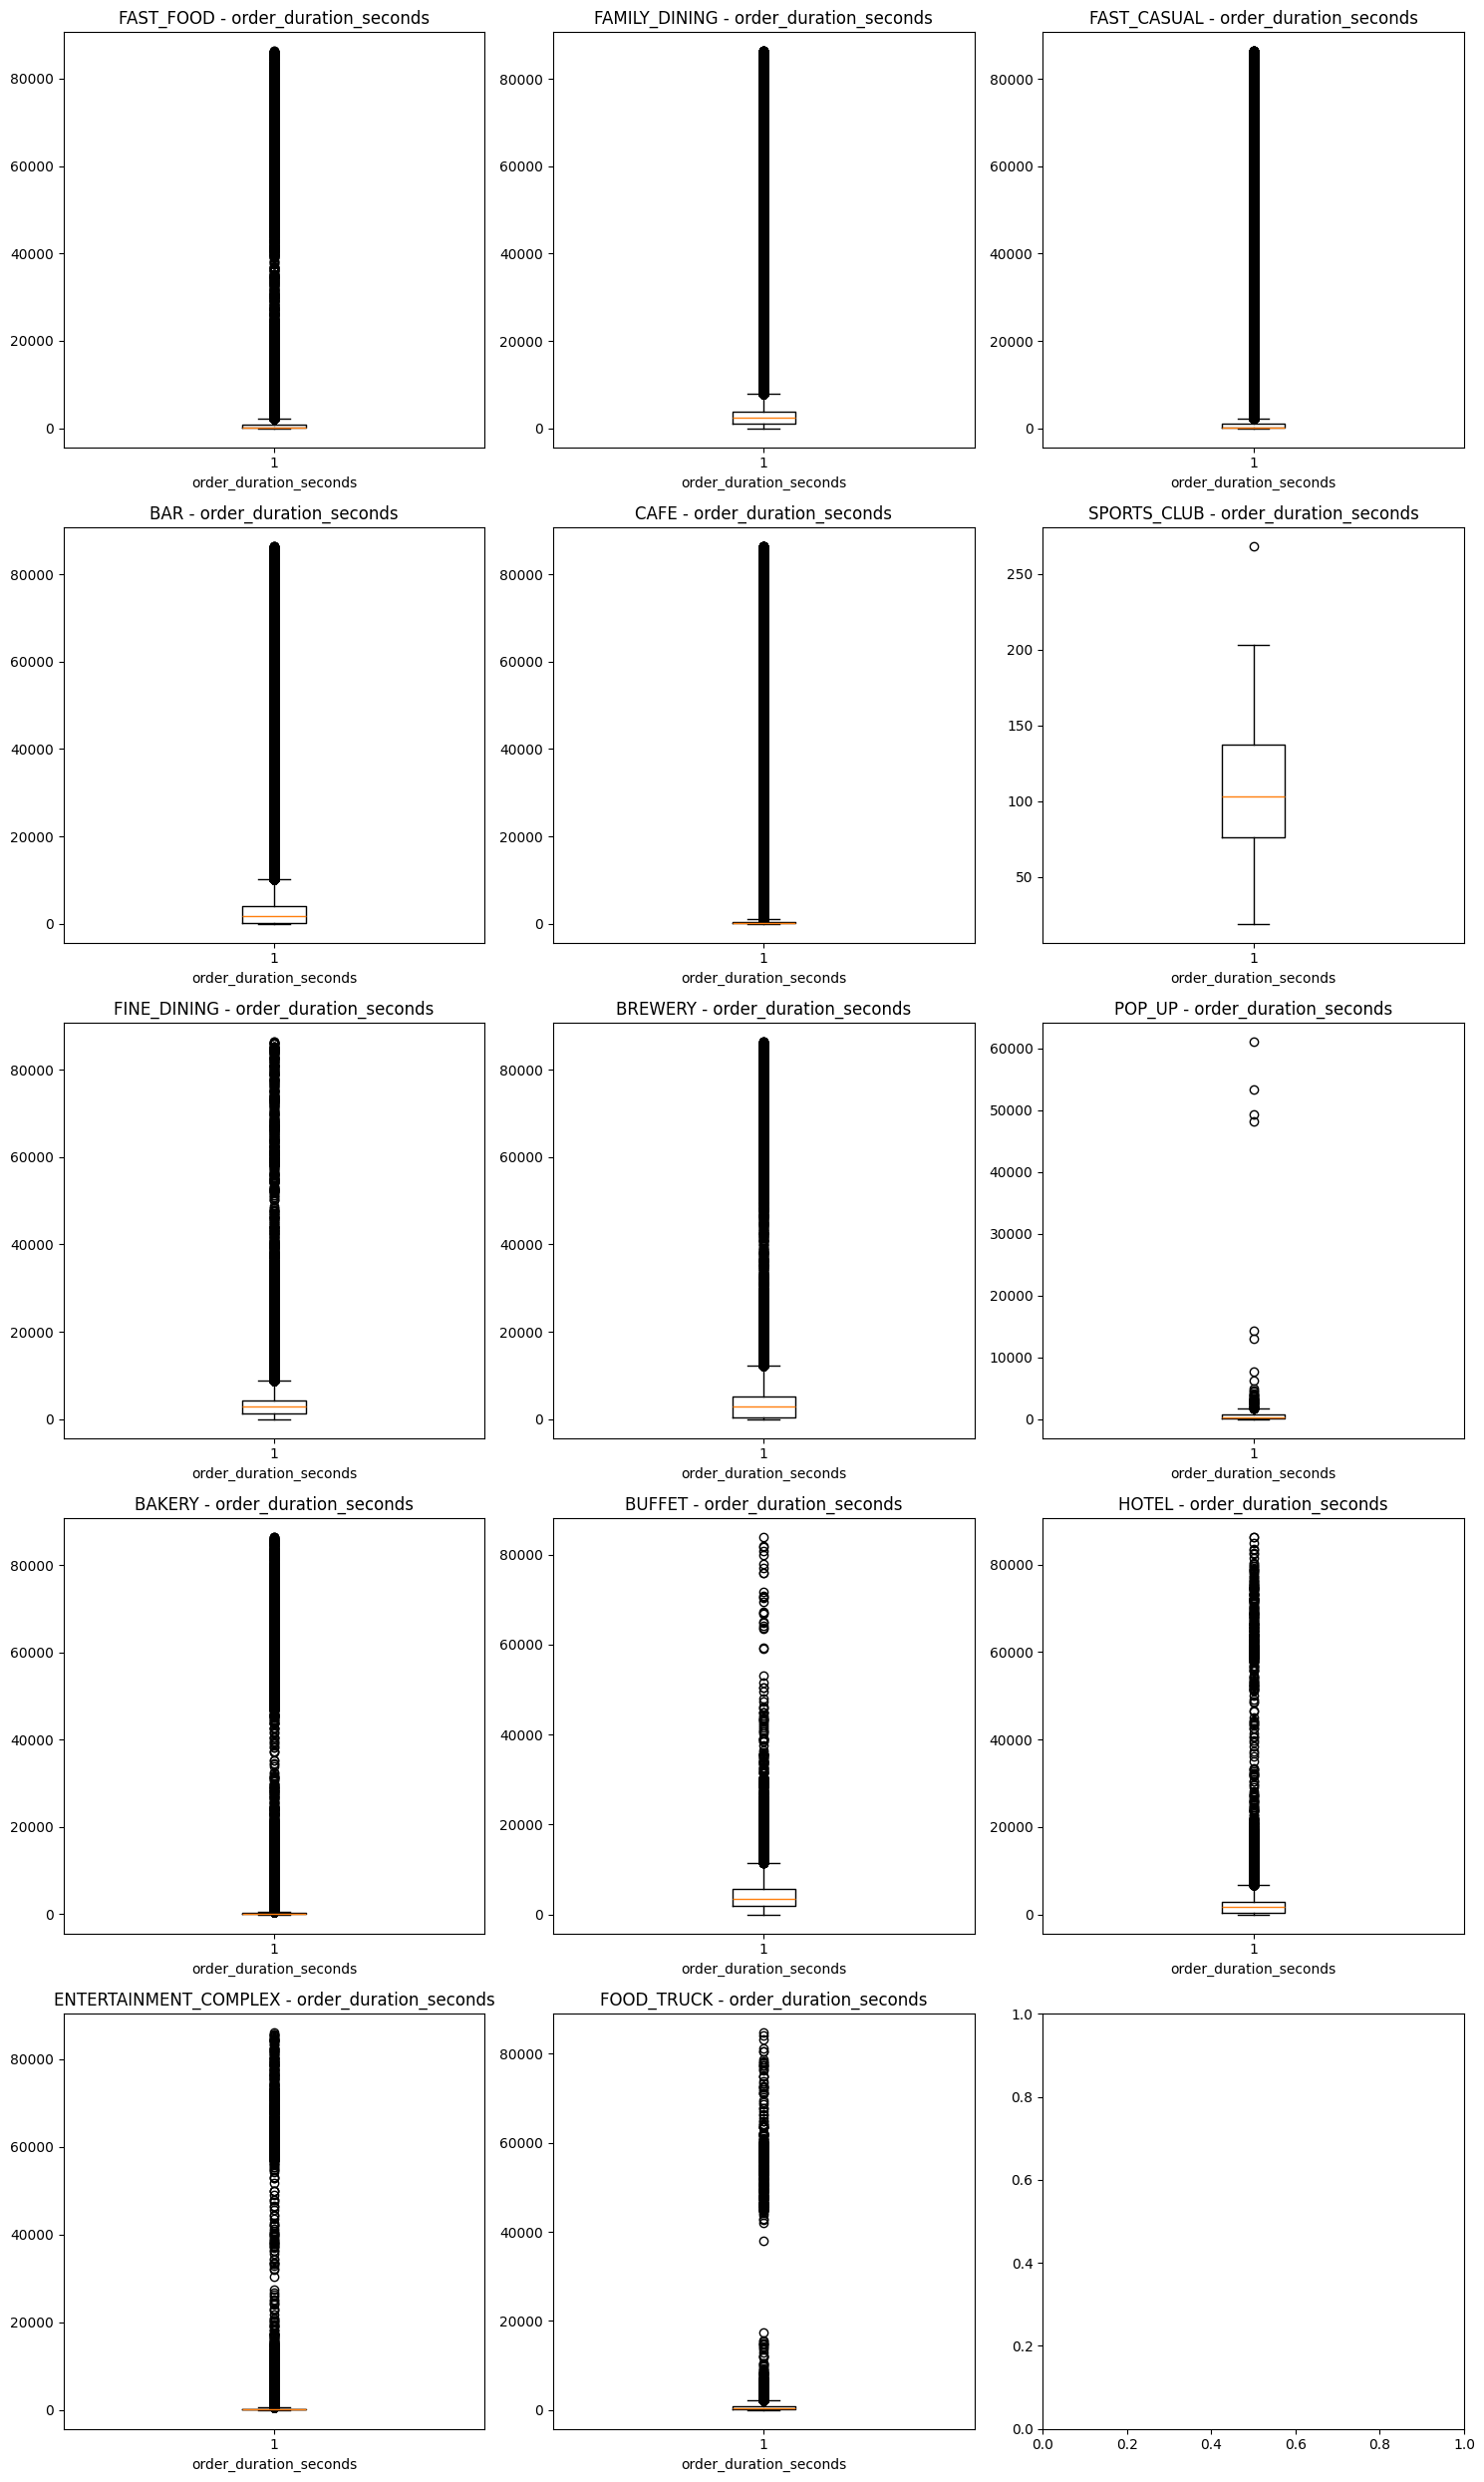

In [4]:
compute_stats_and_box_plot("order_duration_seconds")

In [5]:
import pandas as pd

# Create a dictionary with the summary statistics for order_duration_seconds
data_order_duration = {
    "Venue Type": [
        "FAST_FOOD", "FAMILY_DINING", "FAST_CASUAL", "BAR", "CAFE", "SPORTS_CLUB",
        "FINE_DINING", "BREWERY", "POP_UP", "BAKERY", "BUFFET", "HOTEL",
        "ENTERTAINMENT_COMPLEX", "FOOD_TRUCK"
    ],
    "Mean (seconds)": [1637.99, 3428.36, 1754.82, 3221.25, 1358.86, 118.62, 3526.57, 3935.47, 921.62, 965.31, 4923.48, 2623.04, 1320.41, 1831.55],
    "Median (seconds)": [150.00, 2401.00, 189.00, 1771.00, 125.00, 103.00, 2847.00, 2860.00, 242.00, 96.00, 3507.00, 1768.00, 92.00, 337.00],
    "IQR (seconds)": [829.00, 2785.00, 889.00, 4009.00, 382.00, 61.00, 2948.25, 4766.00, 633.50, 182.00, 3842.00, 2587.00, 223.00, 790.00],
    "Std Dev (seconds)": [7312.08, 5810.74, 7243.69, 5796.87, 6222.68, 80.34, 4445.96, 6226.58, 4217.06, 6092.31, 5759.72, 5459.12, 7690.53, 8017.64],
    "CV": [4.46, 1.69, 4.13, 1.80, 4.58, 0.68, 1.26, 1.58, 4.58, 6.31, 1.17, 2.08, 5.82, 4.38],
    "Skewness": [8.38, 7.38, 8.06, 6.69, 9.32, 0.97, 7.31, 7.35, 11.78, 10.07, 4.09, 9.06, 8.24, 6.83],
    "Kurtosis": [74.28, 74.56, 70.07, 67.57, 96.18, 0.58, 93.85, 75.22, 146.54, 105.06, 31.30, 101.64, 68.73, 46.67]
}

# Create a DataFrame
df_order_duration_summary = pd.DataFrame(data_order_duration)

from IPython.display import display

# Display the summary DataFrame
display(df_order_duration_summary)


,Venue Type,Mean (seconds),Median (seconds),IQR (seconds),Std Dev (seconds),CV,Skewness,Kurtosis
0,FAST_FOOD,1637.99,150.0,829.00,7312.08,4.46,8.38,74.28
1,FAMILY_DINING,3428.36,2401.0,2785.00,5810.74,1.69,7.38,74.56
2,FAST_CASUAL,1754.82,189.0,889.00,7243.69,4.13,8.06,70.07
3,BAR,3221.25,1771.0,4009.00,5796.87,1.80,6.69,67.57
4,CAFE,1358.86,125.0,382.00,6222.68,4.58,9.32,96.18
5,SPORTS_CLUB,118.62,103.0,61.00,80.34,0.68,0.97,0.58
6,FINE_DINING,3526.57,2847.0,2948.25,4445.96,1.26,7.31,93.85
7,BREWERY,3935.47,2860.0,4766.00,6226.58,1.58,7.35,75.22
8,POP_UP,921.62,242.0,633.50,4217.06,4.58,11.78,146.54
9,BAKERY,965.31,96.0,182.00,6092.31,6.31,10.07,105.06


# **Analysis of Order Duration by Venue Type**

## **1. Sports Club Has the Most Consistent Order Times**
- **Sports Club has the lowest CV (0.68), skewness (0.97), and kurtosis (0.58)**, meaning that order durations are **highly consistent with little variability**.
- This suggests a **standardized service process**, likely due to **pre-set orders or limited customization**.

---

## **2. Sit-in Venues Have the Longest Order Durations**
- **Bars (3221s), Family Dining (3428s), Fine Dining (3526s), Breweries (3935s), and Buffets (4923s)** have the **highest mean order durations**.
- These venues typically involve:
  - **Table service**, where orders take longer due to meal preparation and customer dining time.
  - **Multiple-course meals**, leading to longer engagement per order.

---

## **3. Food Trucks Have Medium Order Duration, Likely Due to Line-ups**
- **Food Trucks (1831s mean, 337s median) have mid-range durations**, suggesting that:
  - **Food preparation is fast**, but wait times from line-ups contribute to overall order duration.
  - The **skewness (6.83) and kurtosis (46.67)** indicate that **some extreme wait times exist**, likely due to peak hours.

---

## **4. High Kurtosis in Pop-ups, Bakeries, and Hotels Indicates Frequent Outliers**
- **Pop-ups (Kurtosis = 146.54), Bakeries (105.06), and Hotels (101.64)** have the **highest kurtosis values**.
- This suggests that **most orders are short**, but **some extremely long orders occur**.
- Possible reasons:
  - **Bakeries** may have **both quick takeout and longer café-style seating.**
  - **Hotels** may have **room service orders that take significantly longer.**
  - **Pop-ups** may have **variable service speeds depending on setup complexity**.

---

## **5. Fast Food, Cafés, and Entertainment Complexes Have the Highest Variability**
- **Fast Food (CV = 4.46), Cafés (CV = 4.58), and Entertainment Complexes (CV = 5.82)** show **high variation** in order duration.
- This suggests **unpredictability** in:
  - Customer behavior (some grab-and-go, others sit for a while).
  - Service speed variations due to peak vs. off-peak hours.

---

## **Key Business Insights**
- **Buffets, Bars, and Fine Dining venues** may need **optimized table turnover strategies** to reduce long order durations.
- **Food trucks and pop-ups** should explore ways to manage **queueing systems** to reduce excessive waiting time.
- **High kurtosis venues (hotels, bakeries, pop-ups)** should investigate outliers—**do they represent valid service delays or data anomalies?**
- **Sports Clubs and Cafés show highly predictable order durations**, meaning they may benefit from **fixed scheduling strategies** to optimize staff efficiency.

This analysis provides insights into **operational efficiency, service speed, and customer behavior** across different venue types. 🚀📊


# **Summary of Key Findings Across Venue Types**

This section consolidates insights from three major analyses: **Billing Behavior, Gratuity Patterns, and Order Duration** across different venue types.

---

## **1. Billing Behavior**
- **Fine Dining (44.93) and Buffets (55.43) have the highest mean bills**, as expected from **premium sit-down venues**.
- **Fast Food (18.94), Fast Casual (16.79), and Cafés (14.12) have lower average bills**, catering to quick-service customers.
- **Buffets have the highest variability (IQR = 54.49), while Sports Clubs have the lowest (IQR = 0.00), indicating a consistent low-cost structure.**
- **Most venues have right-skewed distributions**, meaning **a few large transactions significantly impact the mean**.
- **Bars and Breweries show higher bill variability**, likely due to customers ordering **multiple rounds of drinks**.
- **Pricing strategy insights:** Sit-down venues should **optimize menu pricing**, while fast-service venues should **focus on high-volume, low-cost transactions**.

---

## **2. Gratuity (Tipping) Behavior**
- **Tipping is generally rare across all venues**, with **median gratuity at 0** for every venue type.
- **Most gratuity distributions are highly skewed and have extreme outliers**, suggesting that **when tips are given, they are either very small or exceptionally large**.
- **Fine Dining (0.22) and Bakeries (0.01) have the most consistent tipping behavior**, with the lowest Coefficient of Variation (CV).
- **Hotels and Food Trucks show extreme outliers**—**some customers leave very large tips**, while most do not tip at all.
- **Buffets, Sports Clubs, and Entertainment Complexes have no meaningful tipping data**, likely due to **built-in service charges or non-tipping business models**.
- **Strategic takeaway:** Digital payment systems should **encourage tipping prompts** in Fast Food, Café, and Fast Casual settings to **increase gratuity rates**.

---

## **3. Order Duration Insights**
- **Sports Clubs have the lowest variability, with predictable and short order times** (**Mean = 118s, CV = 0.68**), indicating **a streamlined service process**.
- **Fine Dining (3526s), Bars (3221s), Breweries (3935s), and Buffets (4923s) have the longest order durations**, reinforcing that **sit-down venues take longer due to multiple courses and table service**.
- **Food Trucks (1831s mean, 337s median) have medium order times**, likely influenced by **queueing delays rather than meal preparation time**.
- **Pop-Ups, Bakeries, and Hotels have the most extreme outliers**, suggesting **occasional long orders that disrupt the typical order duration**.
- **Fast Food, Cafés, and Entertainment Complexes show the highest variability**, indicating **unpredictable order times due to customer behavior or service inconsistencies**.
- **Operational recommendations:** Sit-down venues should **optimize table turnover**, while high-variance venues should **identify causes of service inconsistency**.

---

## **Final Business Takeaways**
- **Sit-down venues need to balance service speed with customer experience**—long order times impact revenue per seat.
- **Tipping patterns suggest an opportunity to encourage gratuity through digital payment incentives.**
- **Venues with highly variable order durations should investigate service bottlenecks** to improve operational efficiency.
- **Sports Clubs and Cafés, with predictable durations, can optimize staffing and inventory planning accordingly.**
- **Buffets and Fine Dining venues should monitor revenue per table to maximize profitability without compromising customer experience.**

By leveraging these insights, **venue operators can optimize pricing, service speed, and customer experience** for improved profitability and customer satisfaction.


# Step 3: Benchmark Performance Metrics:

In [8]:
import numpy as np
import pandas as pd

# Compute KPIs
filtered_combined_df["sales_per_minute"] = filtered_combined_df["bill_total_net"] / (filtered_combined_df["order_duration_seconds"] / 60)
filtered_combined_df["avg_tip_percentage"] = (filtered_combined_df["payment_total_tip"] / filtered_combined_df["bill_total_net"]) * 100

# Group by venue concept and calculate averages
kpi_summary = filtered_combined_df.groupby("concept").agg(
    median_sales_per_minute=("sales_per_minute", "median"),
    median_tip_percentage=("avg_tip_percentage", "median"),
    median_order_duration=("order_duration_seconds", "median")
).reset_index()

from IPython.display import display

# Display the KPI summary
display(kpi_summary)


,concept,median_sales_per_minute,median_tip_percentage,median_order_duration
0,BAKERY,5.744681,0.0,96.0
1,BAR,0.950226,0.0,1771.0
2,BREWERY,0.714967,18.0,2860.0
3,BUFFET,0.897010,0.0,3507.0
4,CAFE,4.542480,0.0,125.0
5,ENTERTAINMENT_COMPLEX,2.261538,0.0,92.0
6,FAMILY_DINING,0.932623,0.0,2401.0
7,FAST_CASUAL,3.422819,0.0,189.0
8,FAST_FOOD,4.916461,0.0,150.0
9,FINE_DINING,1.007969,0.0,2847.0


# Step 4: Visualization

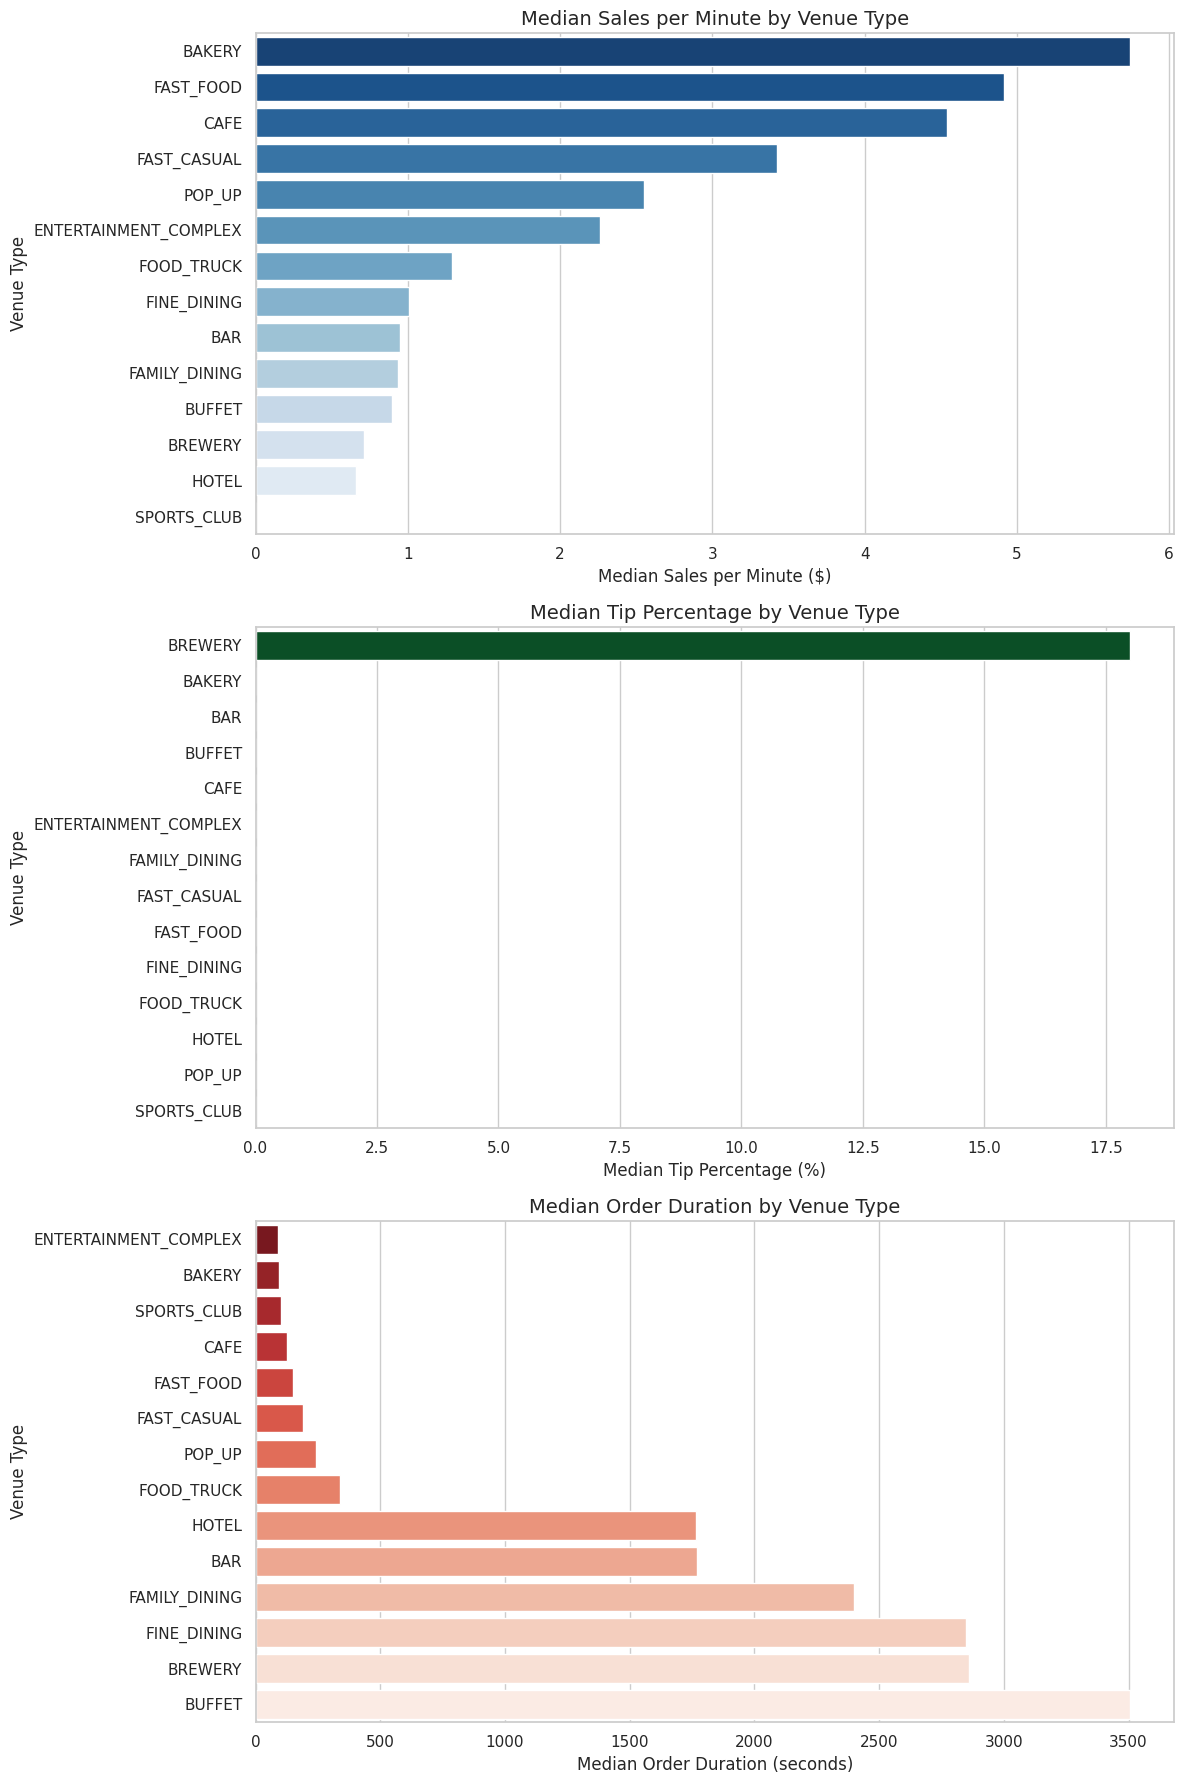

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data for better visualization
kpi_summary_sorted_sales = kpi_summary.sort_values(by="median_sales_per_minute", ascending=False)
kpi_summary_sorted_tip = kpi_summary.sort_values(by="median_tip_percentage", ascending=False)
kpi_summary_sorted_duration = kpi_summary.sort_values(by="median_order_duration", ascending=True)

# Set plot style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1️⃣ Sales per Minute (Bar Chart)
sns.barplot(
    x="median_sales_per_minute", y="concept", hue="concept", data=kpi_summary_sorted_sales, ax=axes[0], palette="Blues_r"
)
axes[0].set_title("Median Sales per Minute by Venue Type", fontsize=14)
axes[0].set_xlabel("Median Sales per Minute ($)", fontsize=12)
axes[0].set_ylabel("Venue Type", fontsize=12)

# 2️⃣ Tip Percentage (Bar Chart)
sns.barplot(
    x="median_tip_percentage", y="concept", hue="concept", data=kpi_summary_sorted_tip, ax=axes[1], palette="Greens_r"
)
axes[1].set_title("Median Tip Percentage by Venue Type", fontsize=14)
axes[1].set_xlabel("Median Tip Percentage (%)", fontsize=12)
axes[1].set_ylabel("Venue Type", fontsize=12)

# 3️⃣ Order Duration (Bar Chart)
sns.barplot(
    x="median_order_duration", y="concept", hue="concept", data=kpi_summary_sorted_duration, ax=axes[2], palette="Reds_r"
)
axes[2].set_title("Median Order Duration by Venue Type", fontsize=14)
axes[2].set_xlabel("Median Order Duration (seconds)", fontsize=12)
axes[2].set_ylabel("Venue Type", fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


# Step 5: Conclusion

# **Conclusion & Recommendations**

## **1️⃣ Fast-Service Venues: Focus on Quality & Employee Retention**
- **Observation**: **Fast Food, Fast Casual, Cafés, and Food Trucks** have **high sales per minute** and **short order durations**, indicating efficient operations.
- **Recommendation**: Since these venues **prioritize speed**, they should **focus on enhancing food quality** and **employee retention** to maintain service consistency and customer satisfaction.

## **2️⃣ Sit-Down Venues: Optimize Staffing Based on Customer Flow**
- **Observation**: **Fine Dining, Bars, Family Dining, Buffets, and Breweries** have **longer order durations**, making **employee management crucial**.
- **Recommendation**: These venues should **analyze customer flow patterns** to optimize **staffing levels**—increasing staff during **peak hours** and reducing during **off-peak hours** to **balance cost efficiency and service quality**.

## **3️⃣ Tipping Culture: Avoid Fixed Tip Suggestions**
- **Observation**: Most **venues see a median tip percentage of 0%**, except for **Breweries (18%)**.
- **Recommendation**: **Avoid enforcing fixed tipping suggestions** (e.g., requiring a minimum 20% tip).  
  - Customers may feel discouraged from tipping when forced into **preset options**.  
  - Instead, venues can **improve employee wages** and **service quality** as an alternative to tipping-based compensation.  
  - Example: **In China, where tipping is rare, high service quality is still maintained through proper employee investment.**

## **Final Takeaway**
By leveraging these insights, venues can **optimize revenue, customer satisfaction, and operational efficiency** while making **data-driven improvements** to service quality and staffing strategies. 🚀🍽️
